In [227]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [228]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('/content/drive/My Drive/Research/datasets/heart_statlog_cleveland_hungary_final.csv', delimiter = ',')

In [229]:
dataset.head(10)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,4,140,207,0,0,130,1,1.5,2,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


In [230]:
dataset.shape

(1190, 12)

In [231]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [232]:
print("Null values/missing values -")

dataset.isnull().values.any()

Null values/missing values -


False

In [233]:
dataset.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [234]:
print("attributes are - ")

dataset.columns

attributes are - 


Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [235]:
cat_val = [] #Categorical Values
cont_val = [] #Continous Values
for column in dataset.columns:
    print('###################################')
    print(f"{column} : {dataset[column].unique()}")
    if len(dataset[column].unique()) <= 10:
        cat_val.append(column)
    else:
        cont_val.append(column)

###################################
age : [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
###################################
sex : [1 0]
###################################
chest pain type : [2 3 4 1]
###################################
resting bp s : [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
###################################
cholesterol : [289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 2

In [236]:
print("Knowing the type of atrributes --- ")
print()
print("Categorical attributes :")
for i in cat_val:
  print(i)

print()

print("Contionus attributes :")
for i in cont_val:
  print(i)

Knowing the type of atrributes --- 

Categorical attributes :
sex
chest pain type
fasting blood sugar
resting ecg
exercise angina
ST slope
target

Contionus attributes :
age
resting bp s
cholesterol
max heart rate
oldpeak


In [237]:
for f in cat_val:
    print(f,':')
    print(dataset[f].value_counts())
    print("=============================")

sex :
1    909
0    281
Name: sex, dtype: int64
chest pain type :
4    625
3    283
2    216
1     66
Name: chest pain type, dtype: int64
fasting blood sugar :
0    936
1    254
Name: fasting blood sugar, dtype: int64
resting ecg :
0    684
2    325
1    181
Name: resting ecg, dtype: int64
exercise angina :
0    729
1    461
Name: exercise angina, dtype: int64
ST slope :
2    582
1    526
3     81
0      1
Name: ST slope, dtype: int64
target :
1    629
0    561
Name: target, dtype: int64


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

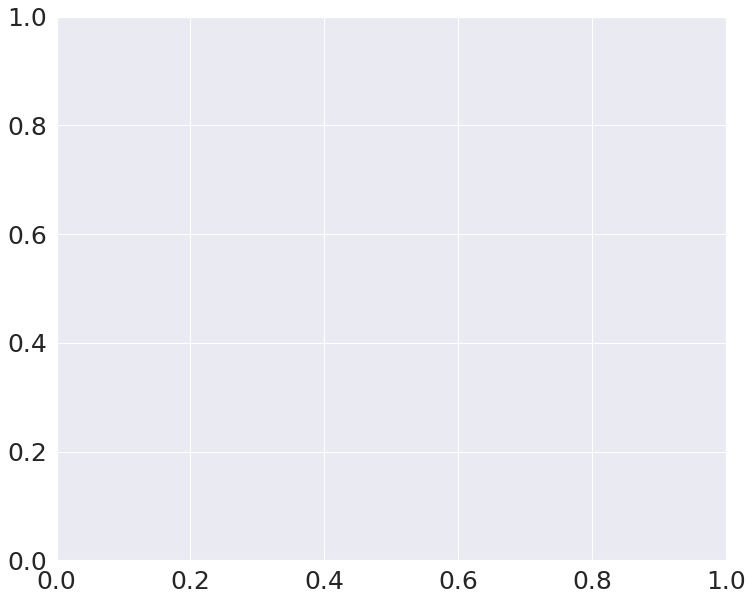

In [238]:
plt.xticks(size = 25)
plt.yticks(size = 25)

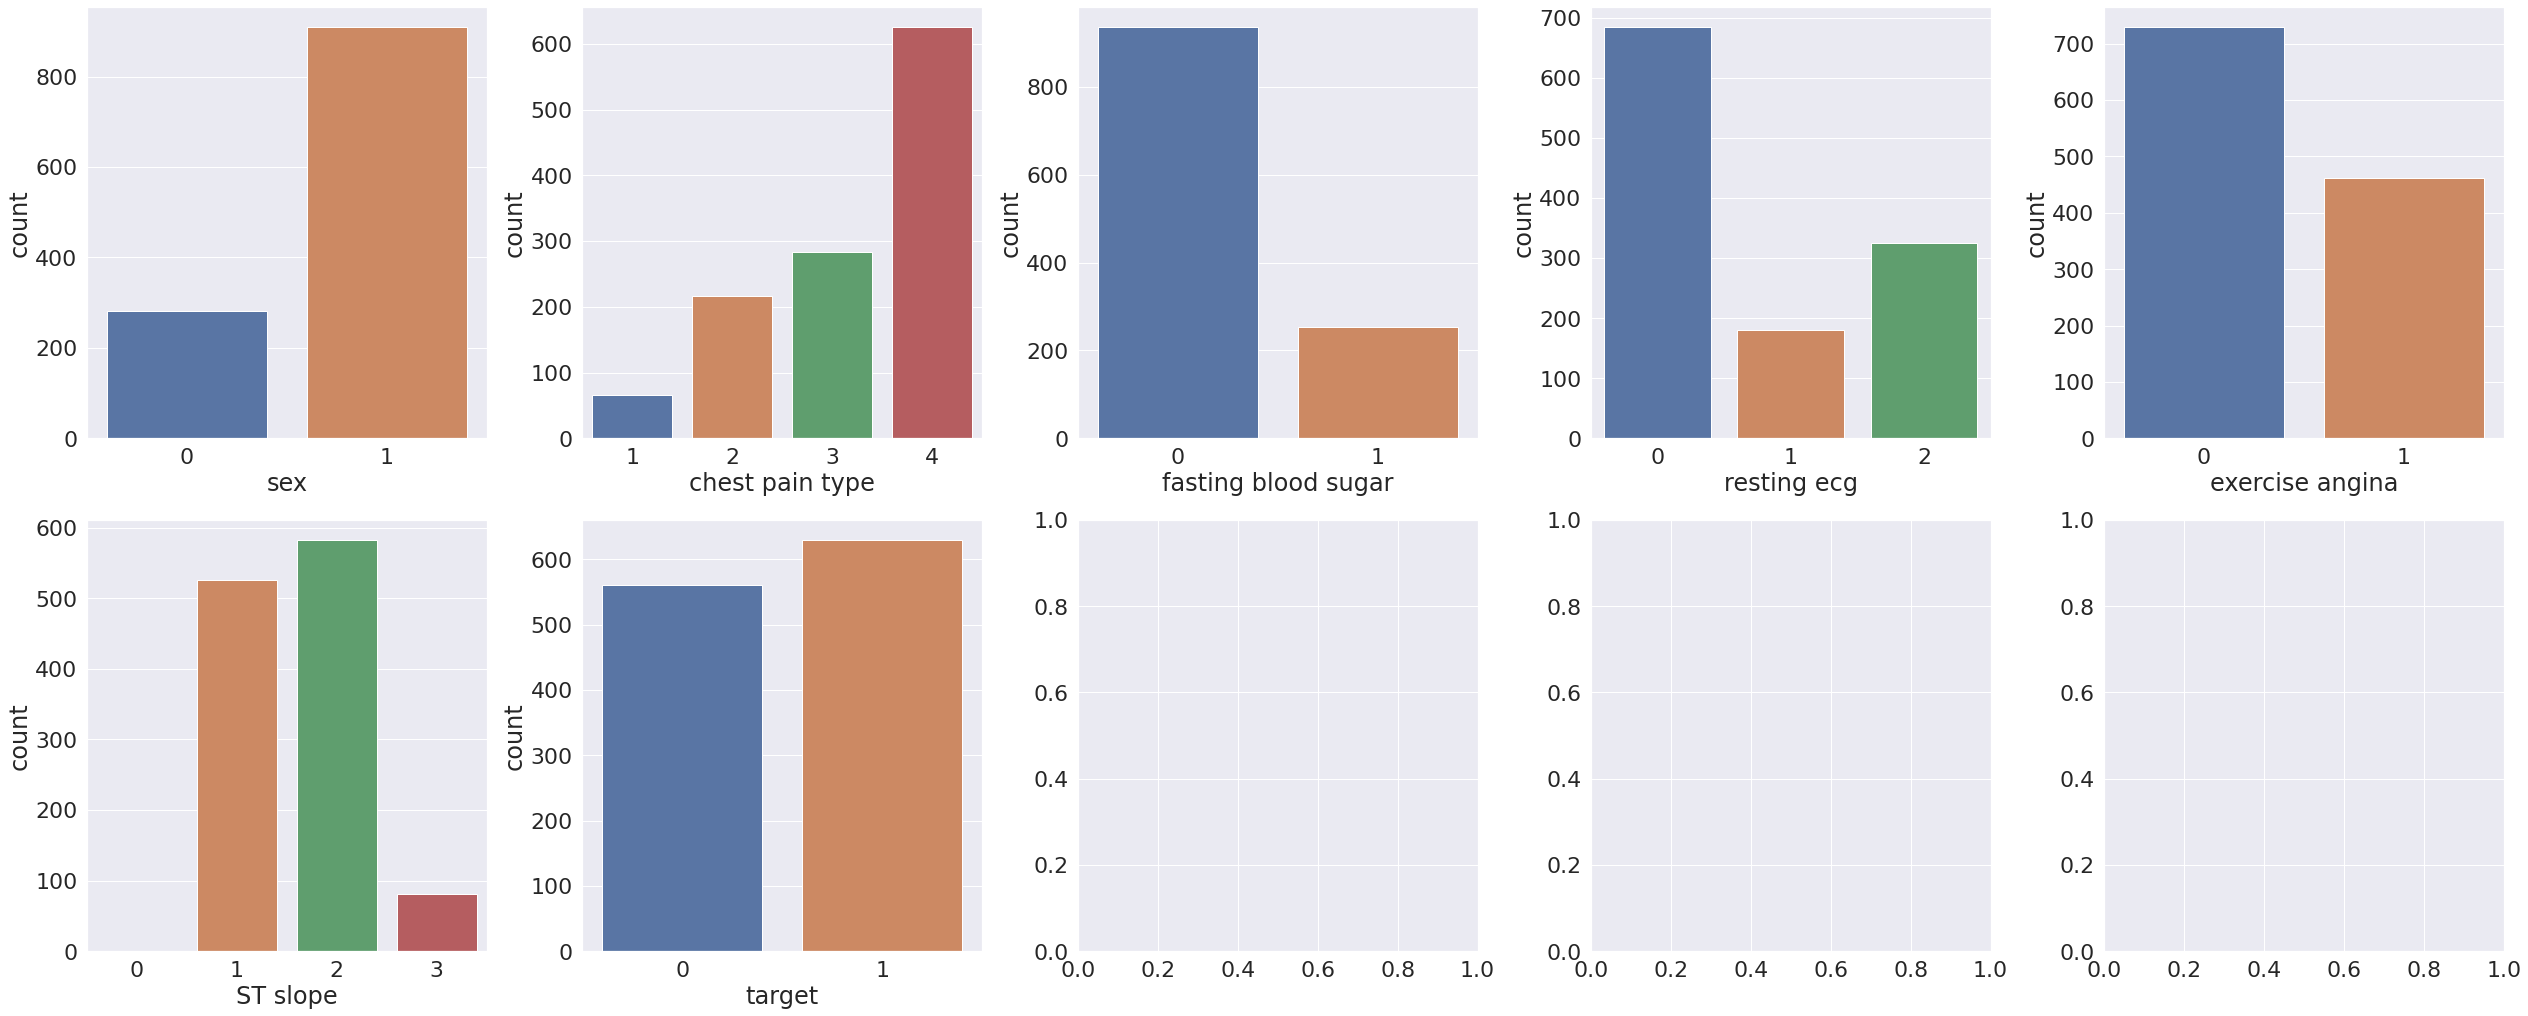

In [239]:
import matplotlib.pyplot as plt
import seaborn as sns

num_plots = len(cat_val)
total_cols = 5
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i,var in enumerate(cat_val):
     row = i//total_cols
     pos = i % total_cols
     plot = sns.countplot(x=var, data=dataset, ax=axs[row][pos])

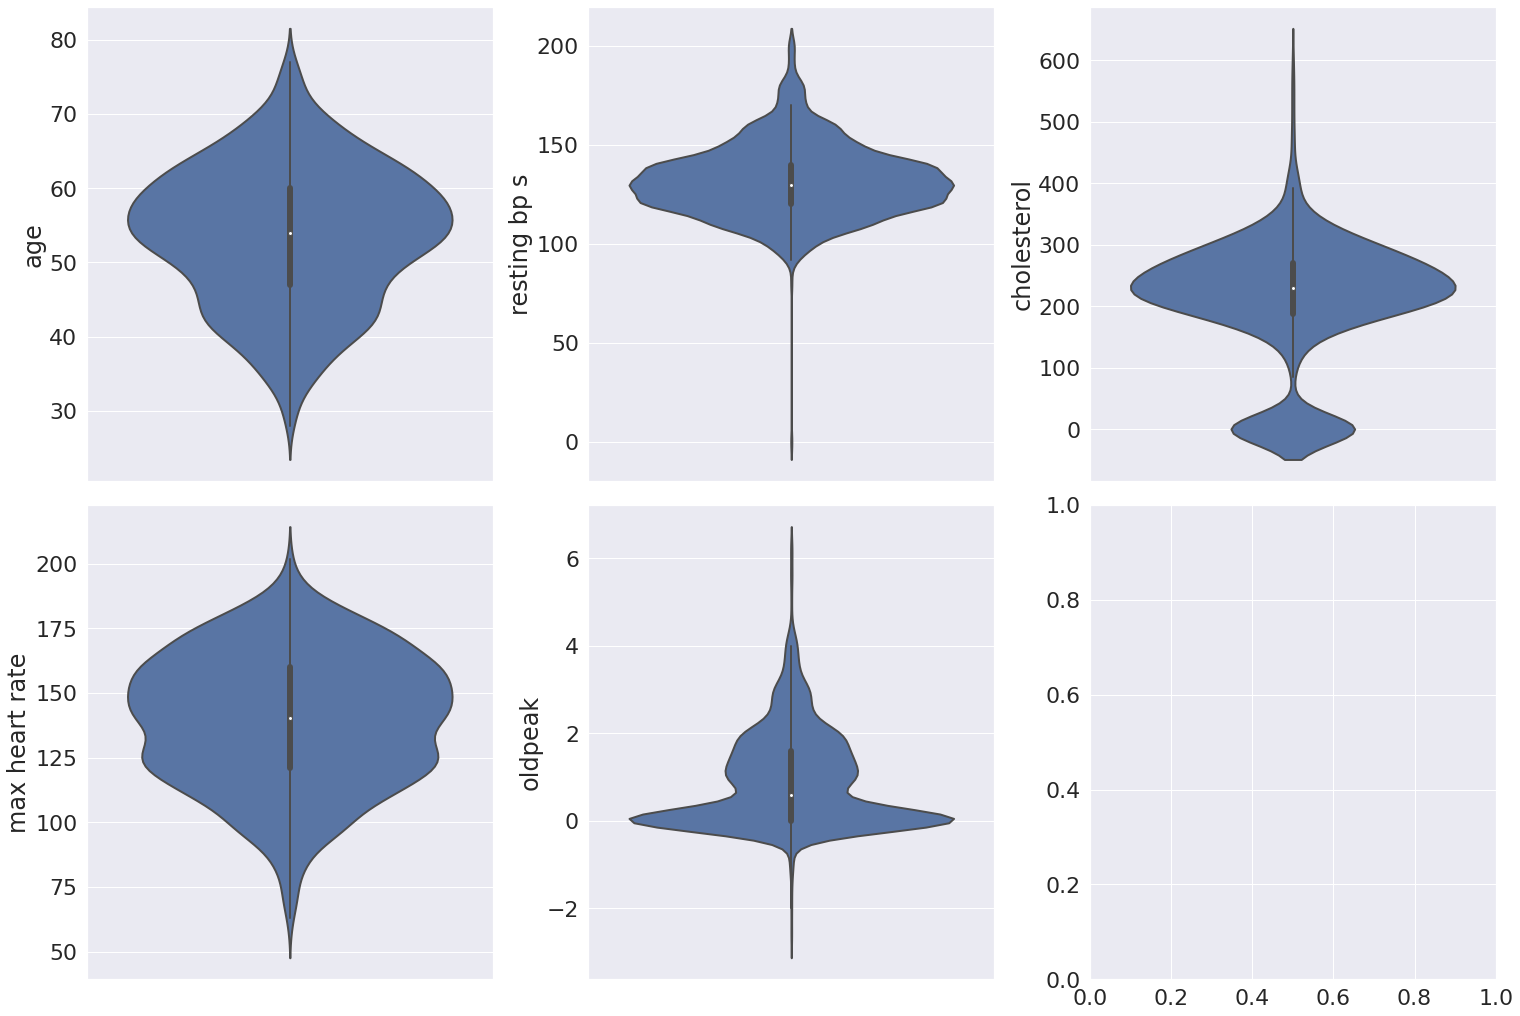

In [240]:
num_plots = len(cont_val)
total_cols = 3
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(cont_val):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.violinplot(y=var, data=dataset, ax=axs[row][pos], linewidth=2)

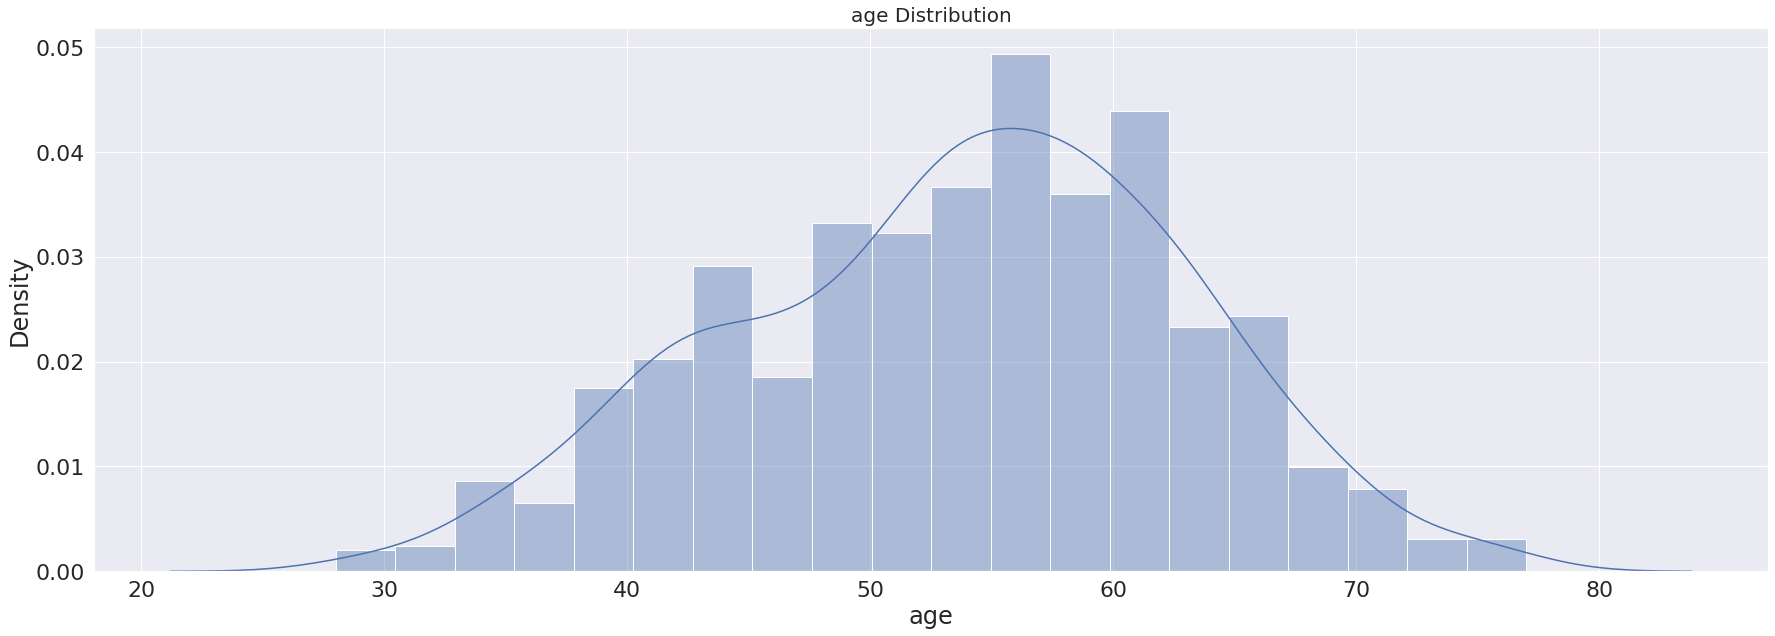

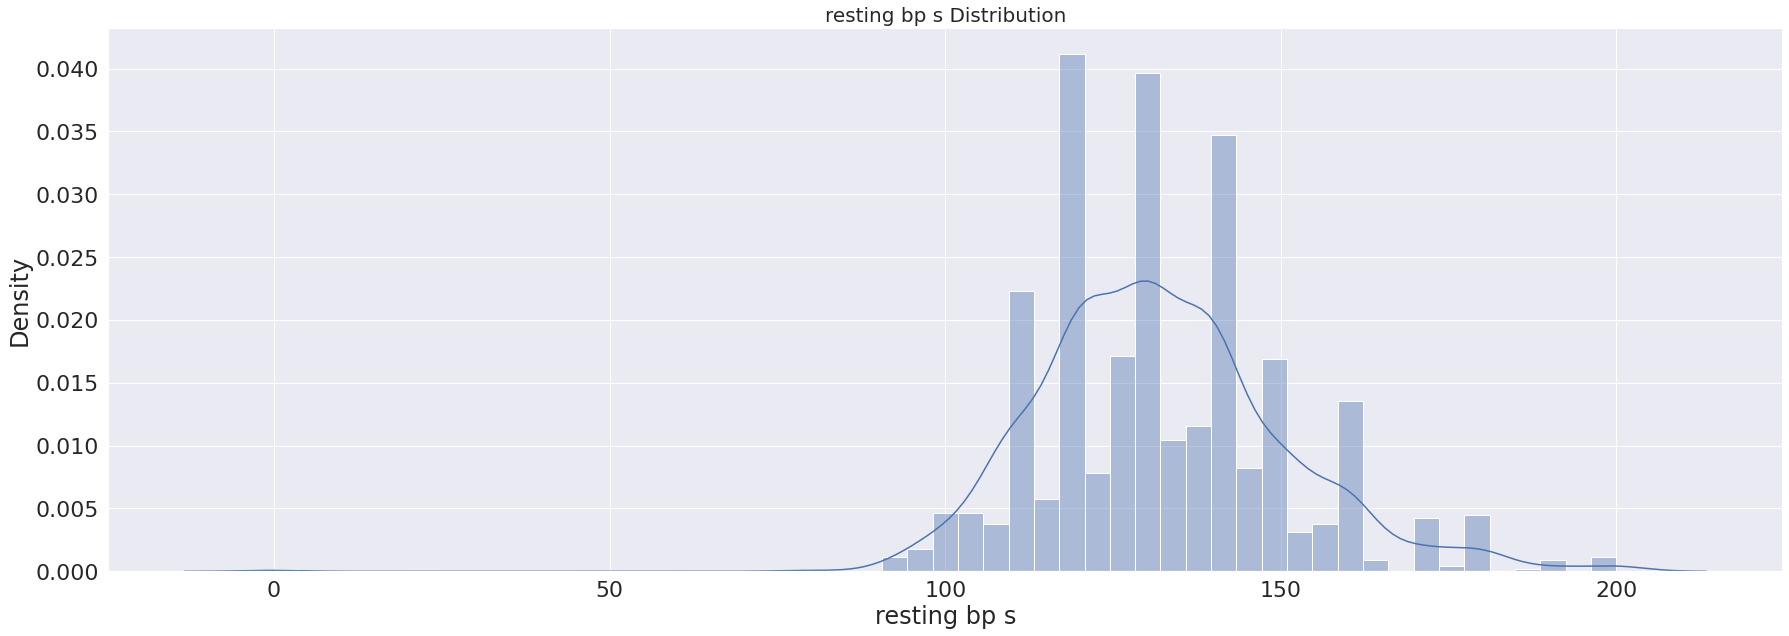

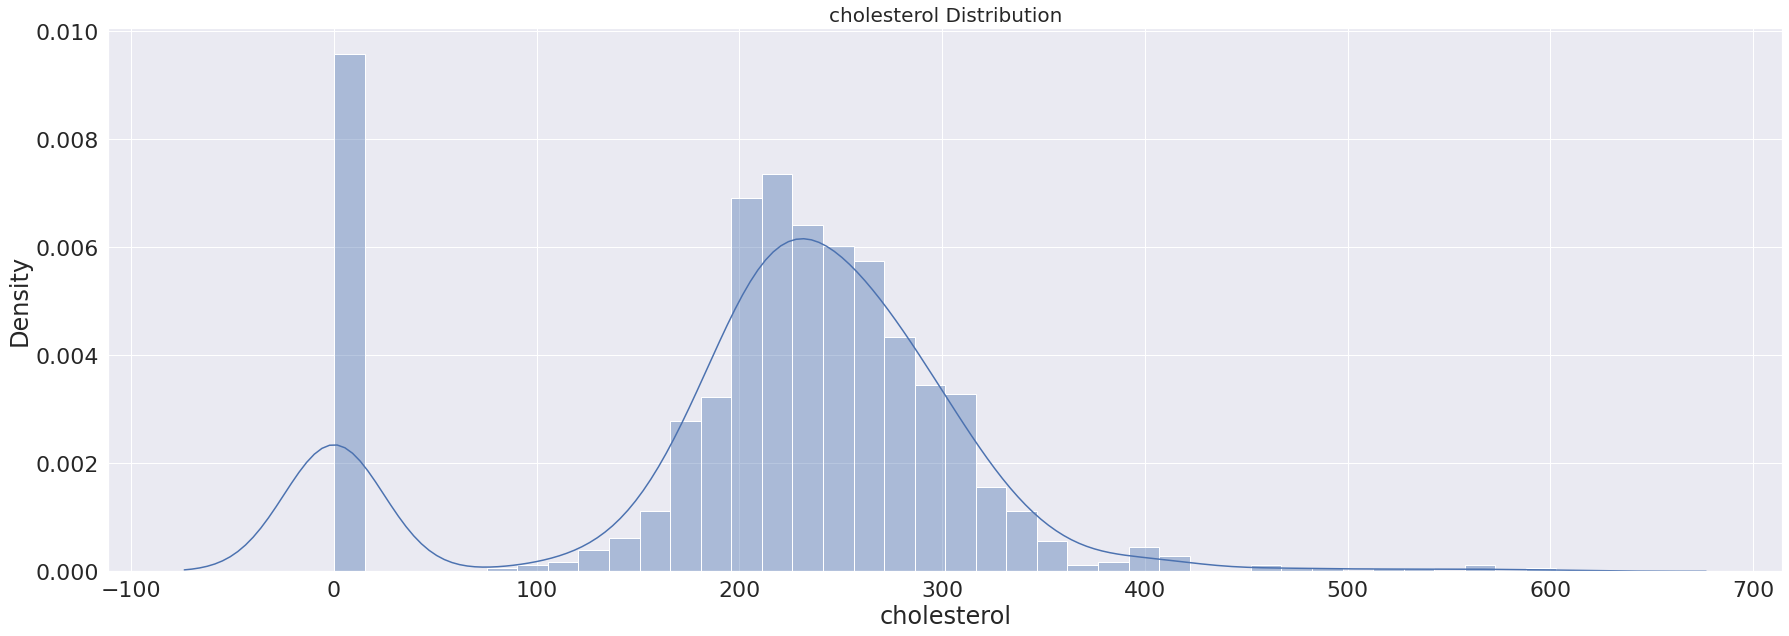

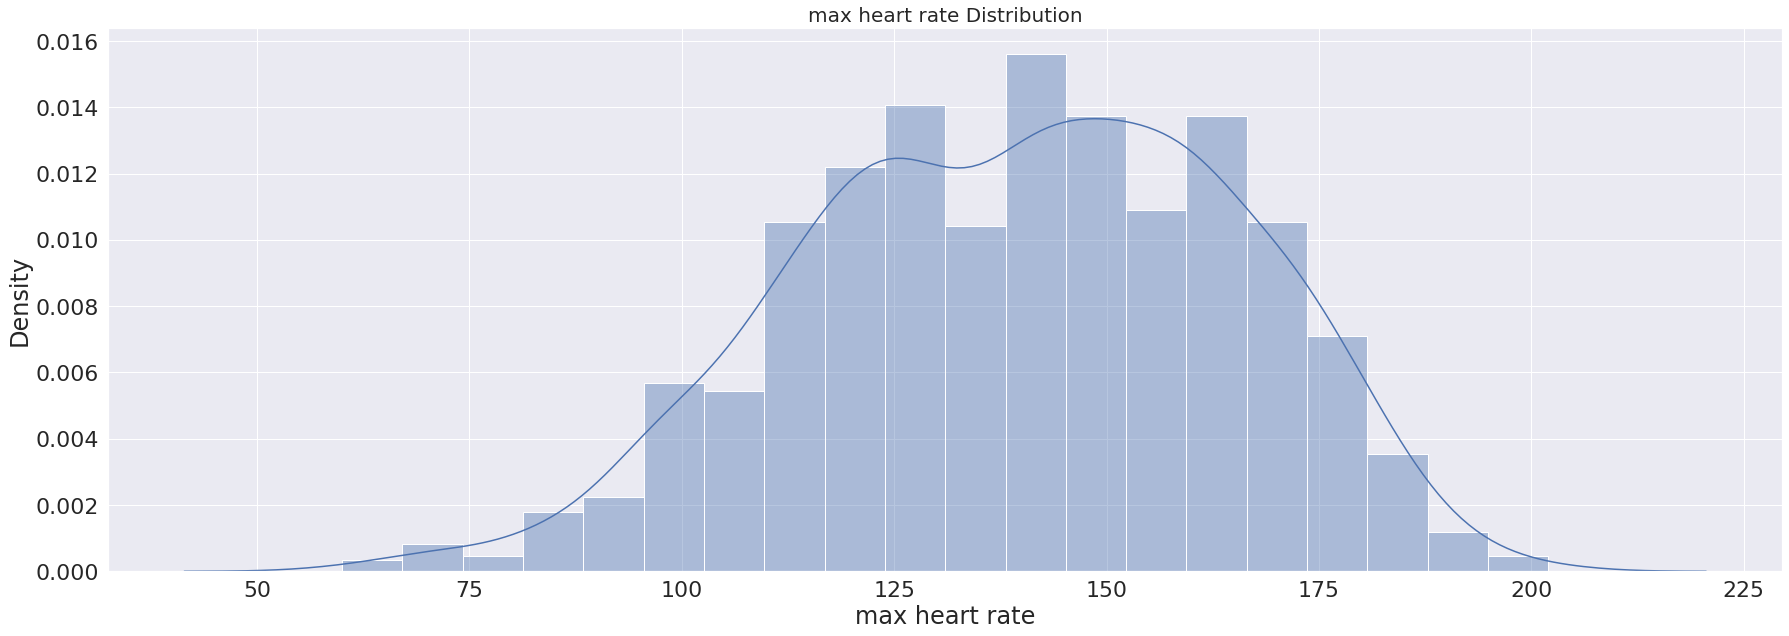

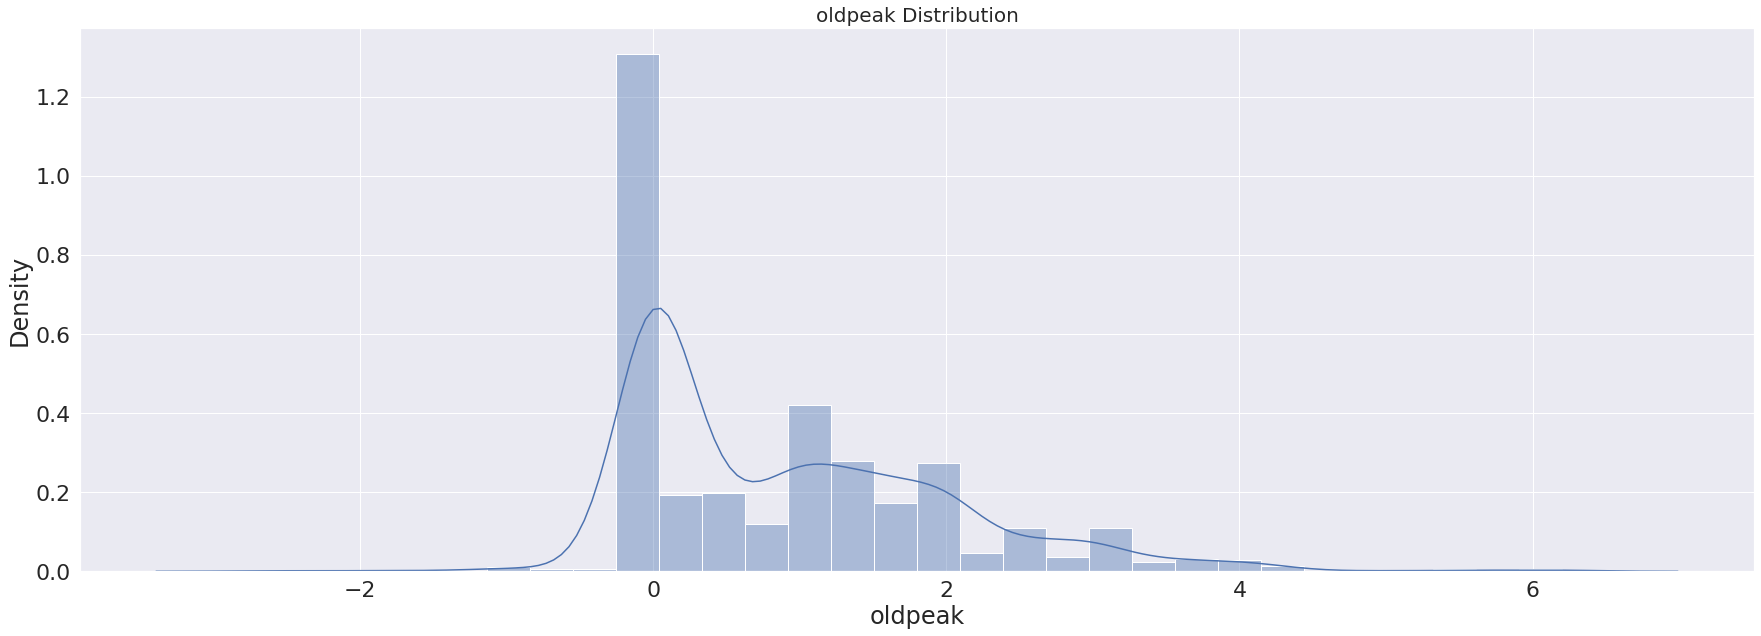

In [241]:
for f in cont_val:
    plt.figure(figsize=(30, 10), facecolor='w')
    sns.histplot(data=dataset[f],stat="density", alpha=0.4, kde=True, kde_kws={"cut": 3})
    #sns.distplot(dataset[f])
    plt.title('{} Distribution'.format(f), fontsize=20)
    plt.show()

In [242]:
print("correlations among attributes - closer to +/- 1 are more likely to be related")
print()
correlation=dataset.corr()
correlation

correlations among attributes - closer to +/- 1 are more likely to be related



,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
age,1.000000,0.015096,0.149055,0.257692,-0.046472,0.178923,0.194595,-0.368676,0.188095,0.245093,0.237749,0.262029
sex,0.015096,1.000000,0.138405,-0.006443,-0.208441,0.110961,-0.022225,-0.181837,0.194380,0.096390,0.127913,0.311267
chest pain type,0.149055,0.138405,1.000000,0.009466,-0.109396,0.076492,0.035705,-0.337491,0.403428,0.224106,0.276949,0.460127
resting bp s,0.257692,-0.006443,0.009466,1.000000,0.099037,0.088235,0.095860,-0.101357,0.142435,0.176111,0.089384,0.121415
cholesterol,-0.046472,-0.208441,-0.109396,0.099037,1.000000,-0.239778,0.150879,0.238028,-0.033261,0.057451,-0.100053,-0.198366
fasting blood sugar,0.178923,0.110961,0.076492,0.088235,-0.239778,1.000000,0.032124,-0.118689,0.053053,0.031193,0.145902,0.216695
resting ecg,0.194595,-0.022225,0.035705,0.095860,0.150879,0.032124,1.000000,0.058812,0.037821,0.126023,0.093629,0.073059
max heart rate,-0.368676,-0.181837,-0.337491,-0.101357,0.238028,-0.118689,0.058812,1.000000,-0.377691,-0.183688,-0.350750,-0.413278
exercise angina,0.188095,0.194380,0.403428,0.142435,-0.033261,0.053053,0.037821,-0.377691,1.000000,0.370772,0.393408,0.481467
oldpeak,0.245093,0.096390,0.224106,0.176111,0.057451,0.031193,0.126023,-0.183688,0.370772,1.000000,0.524639,0.398385


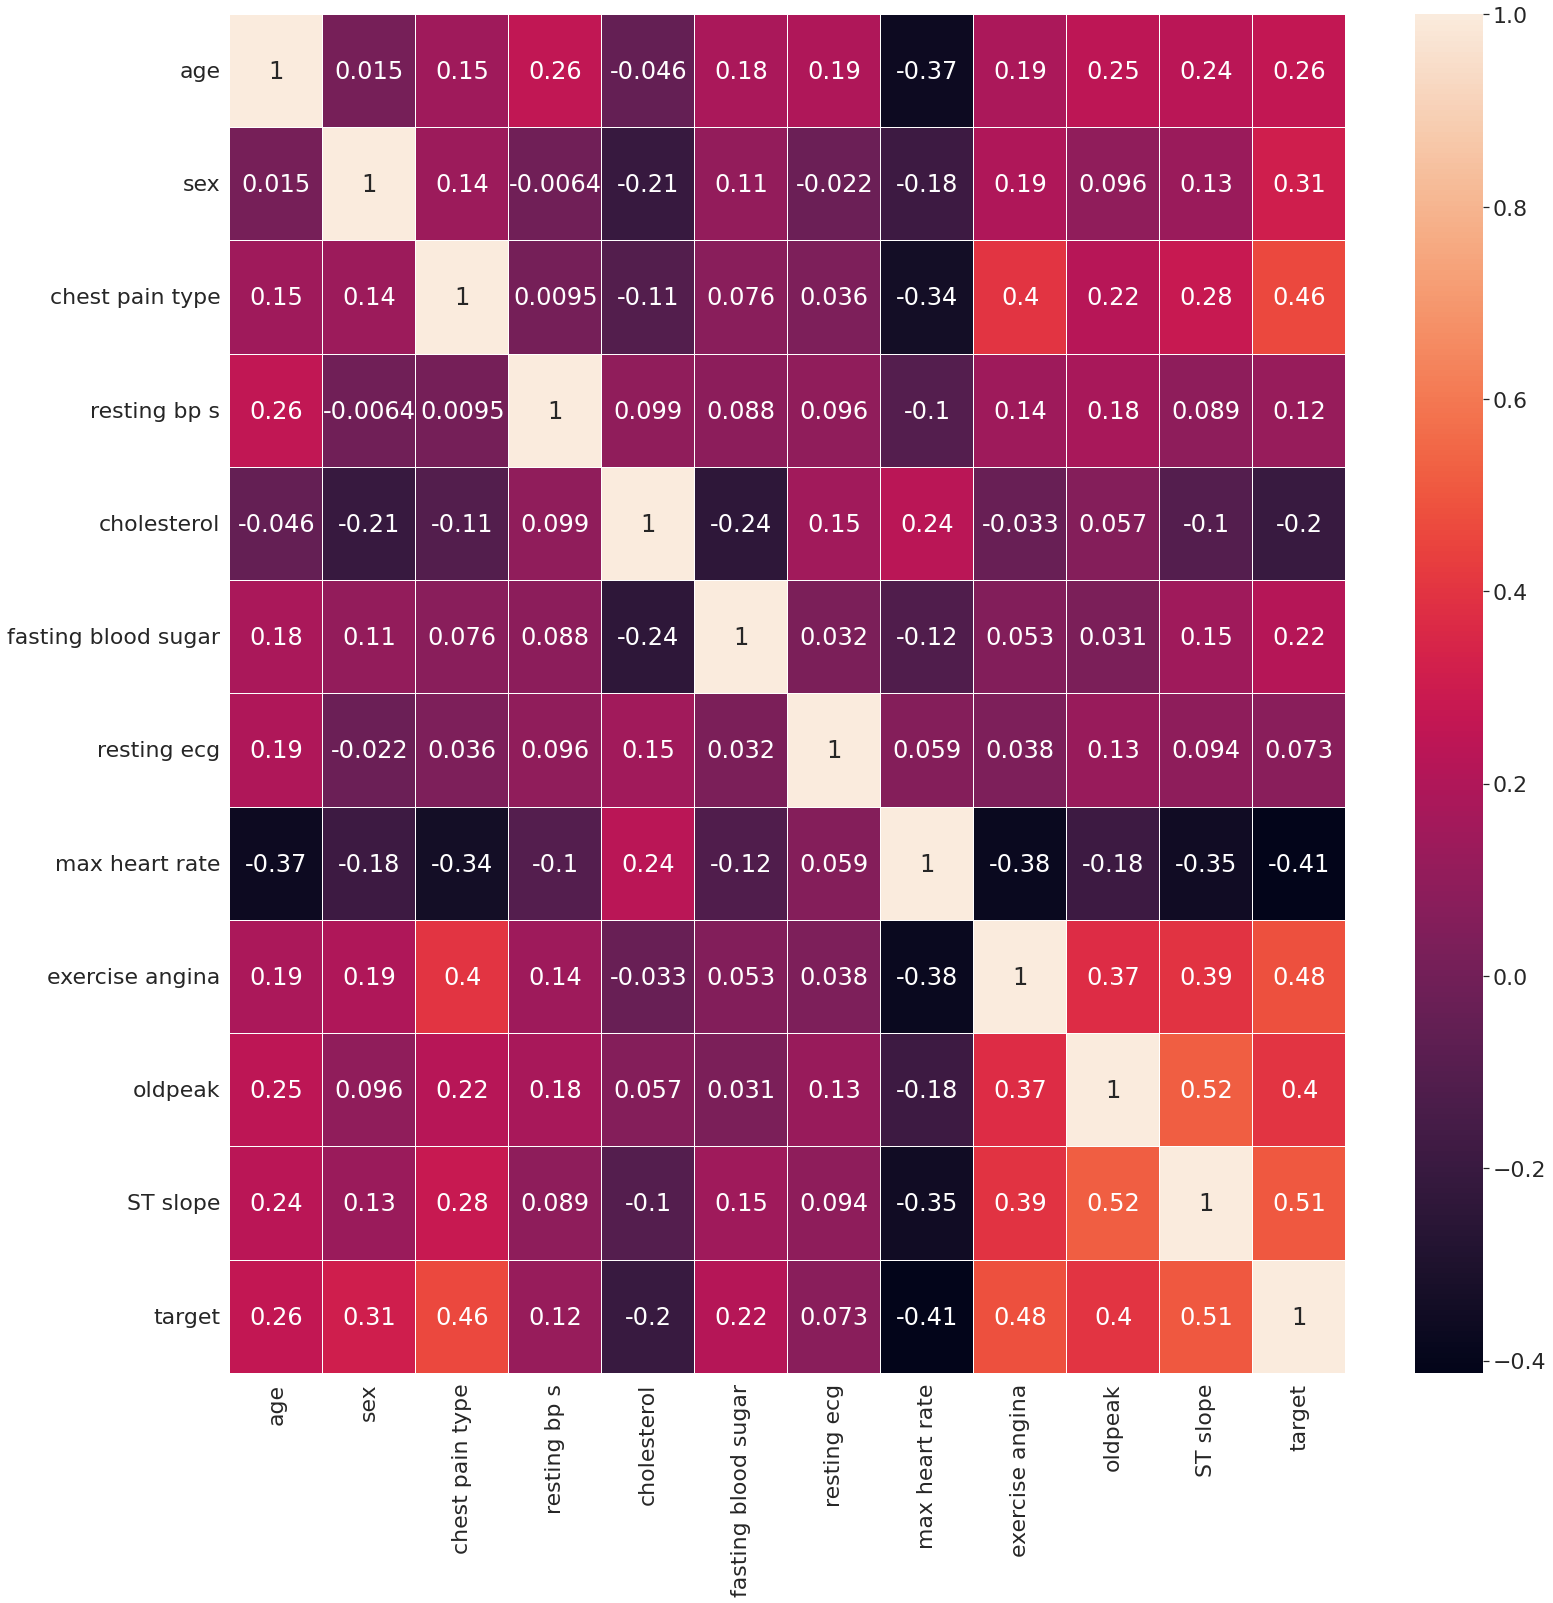

In [243]:
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

plt.figure(figsize=(25,25))
sns.heatmap(dataset.corr(),linewidth=.01,annot=True)
plt.xlabel('', fontsize=13)
plt.ylabel('', fontsize=13)
plt.savefig('correlationfigure.png')
plt.show()
#files.download('correlationfigure.png')

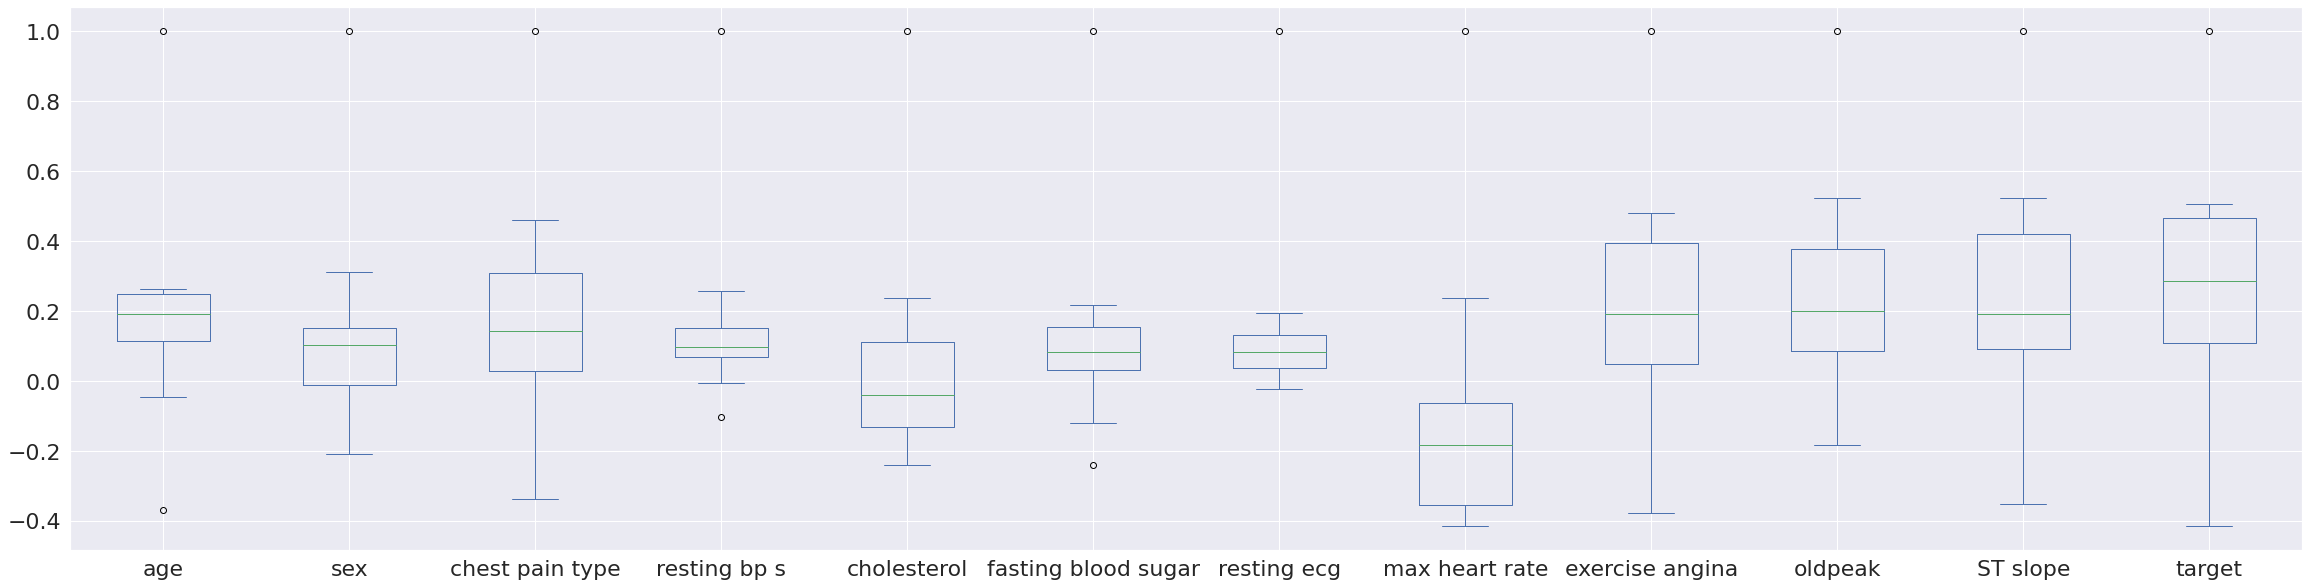

In [299]:
correlation.plot(kind="box",figsize=(40,10))

In [245]:
print("sorting the correlation among attributes corresponding with target- ")

pd.DataFrame(correlation['target']).sort_values(by='target',ascending=False)

sorting the correlation among attributes corresponding with target- 


,target
target,1.000000
ST slope,0.505608
exercise angina,0.481467
chest pain type,0.460127
oldpeak,0.398385
sex,0.311267
age,0.262029
fasting blood sugar,0.216695
resting bp s,0.121415
resting ecg,0.073059


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd0625c190>,
      dtype=object)

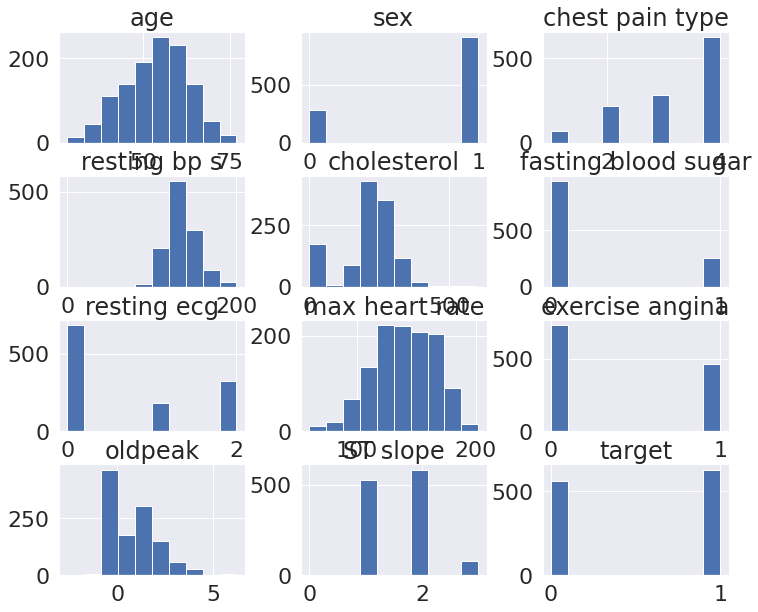

In [300]:
dataset.hist()

0 - absence of HD
1 - presence of HD
1    629
0    561
Name: target, dtype: int64


Text(0.5, 1.0, 'Count of each Target Class')

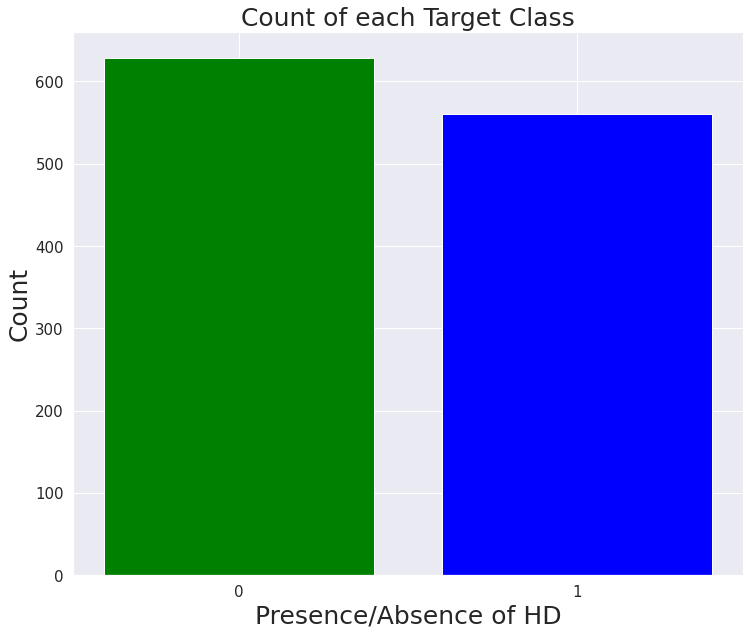

In [247]:
from matplotlib.pyplot import rcParams

print("0 - absence of HD")
print("1 - presence of HD")

print(dataset.target.value_counts())

# 0 - absence of HD
# 1 - presence of HD

rcParams['figure.figsize'] = 12,10
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['green', 'blue'])
plt.xticks([0, 1])
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('Presence/Absence of HD', size = 25)
plt.ylabel('Count',size=25)
plt.title('Count of each Target Class', size = 25)

Outlier Analysis

sex


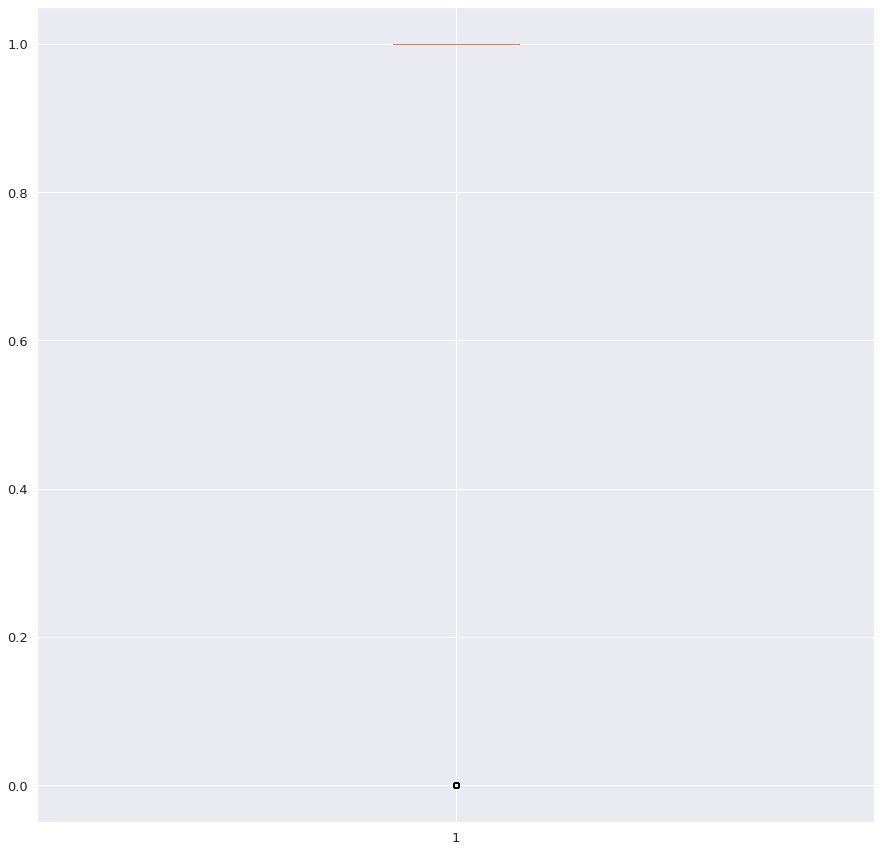

chest pain type


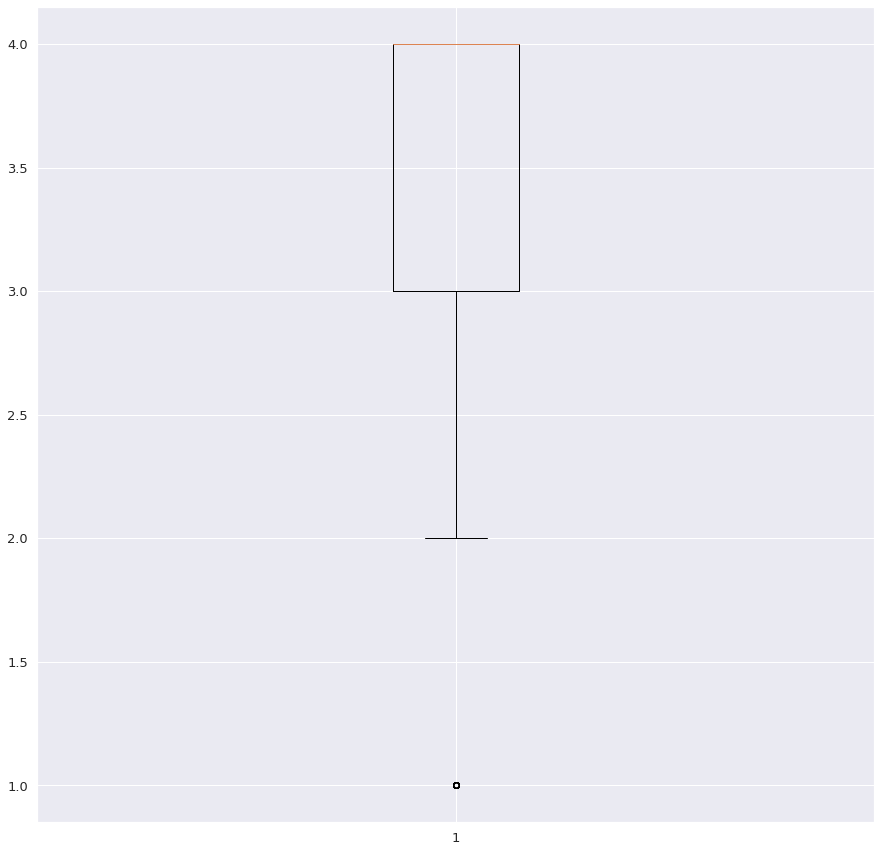

fasting blood sugar


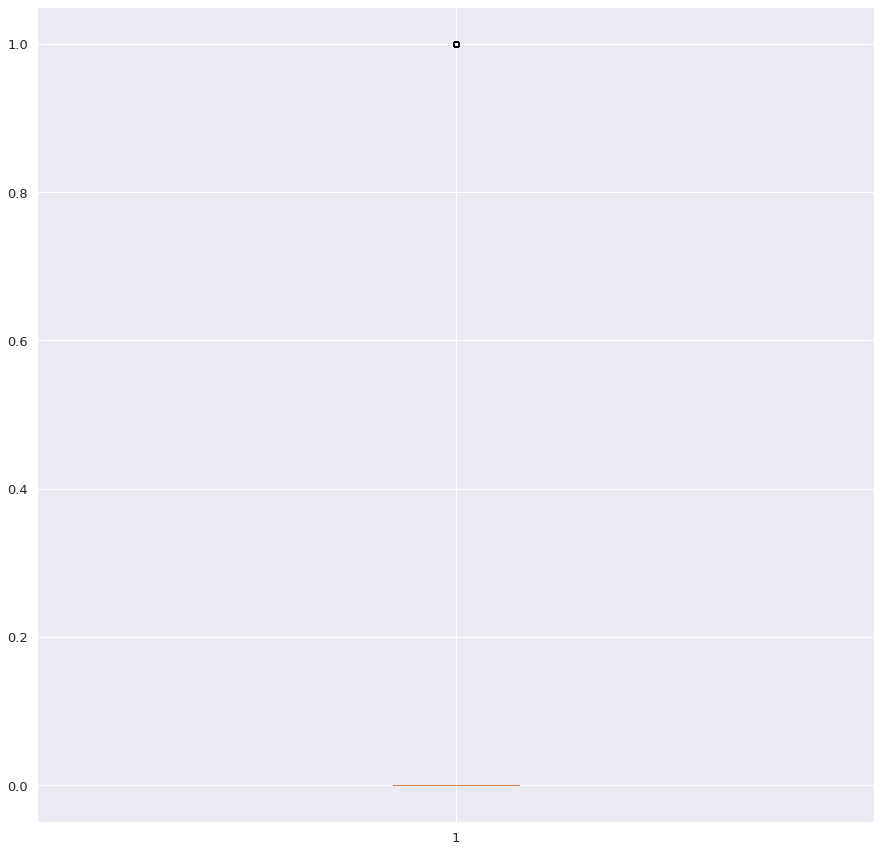

resting ecg


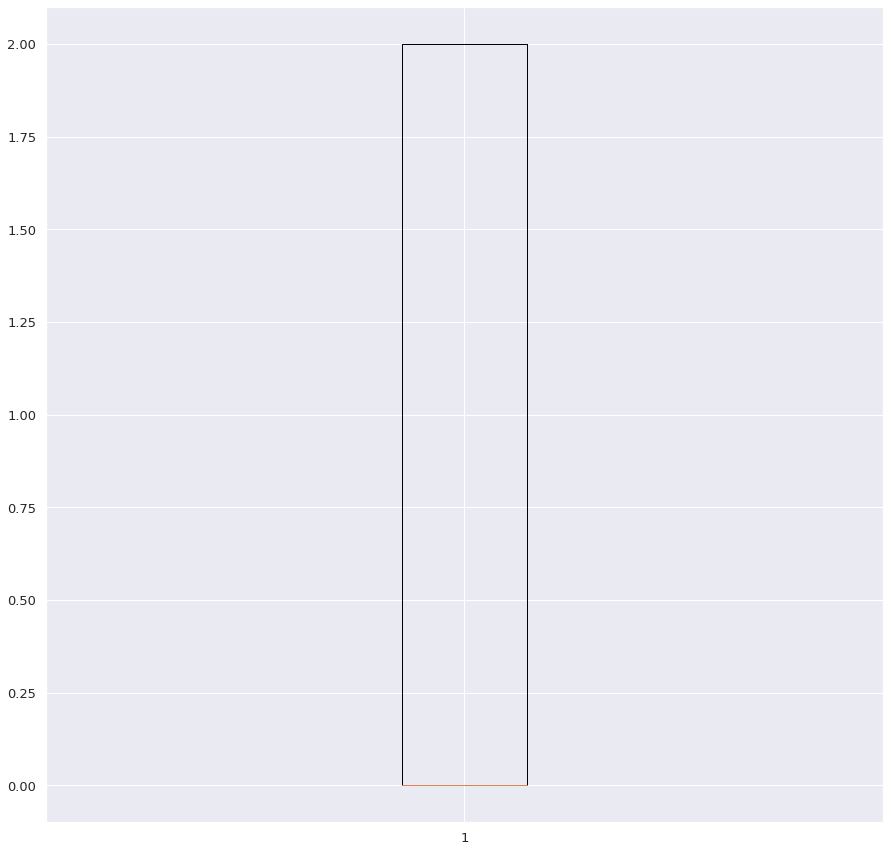

exercise angina


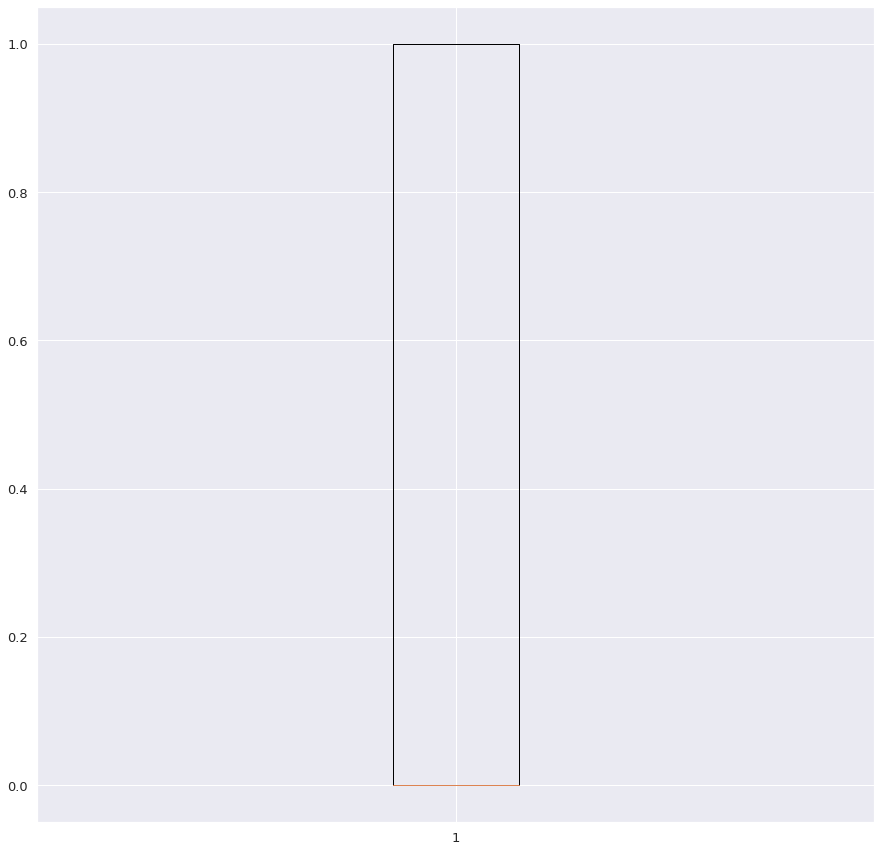

ST slope


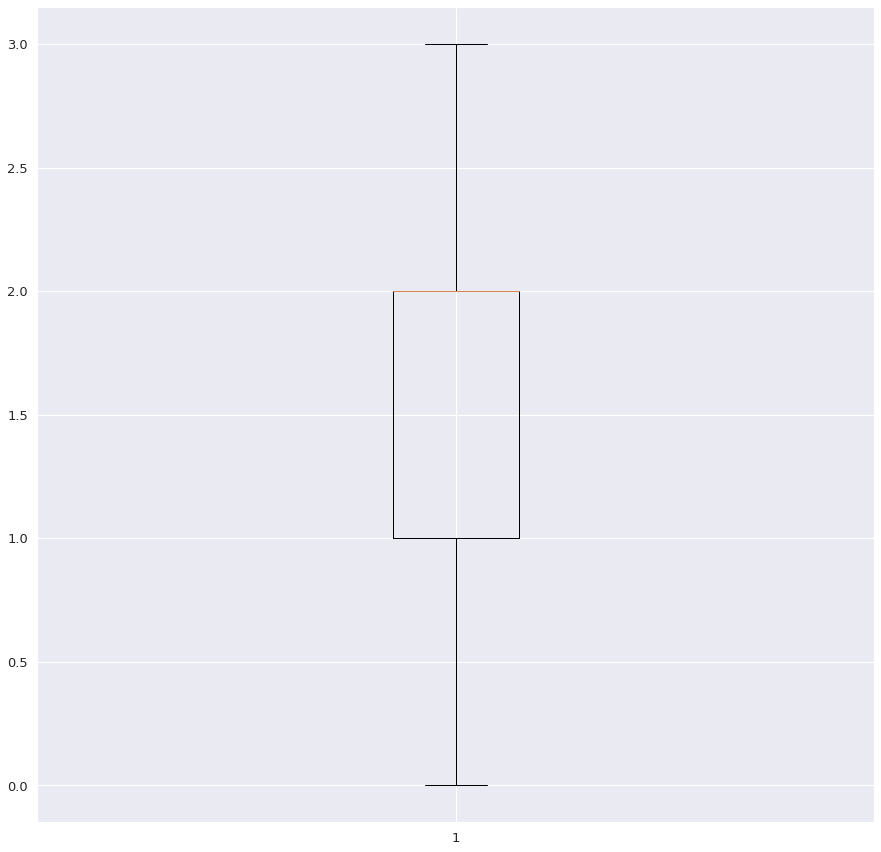

target


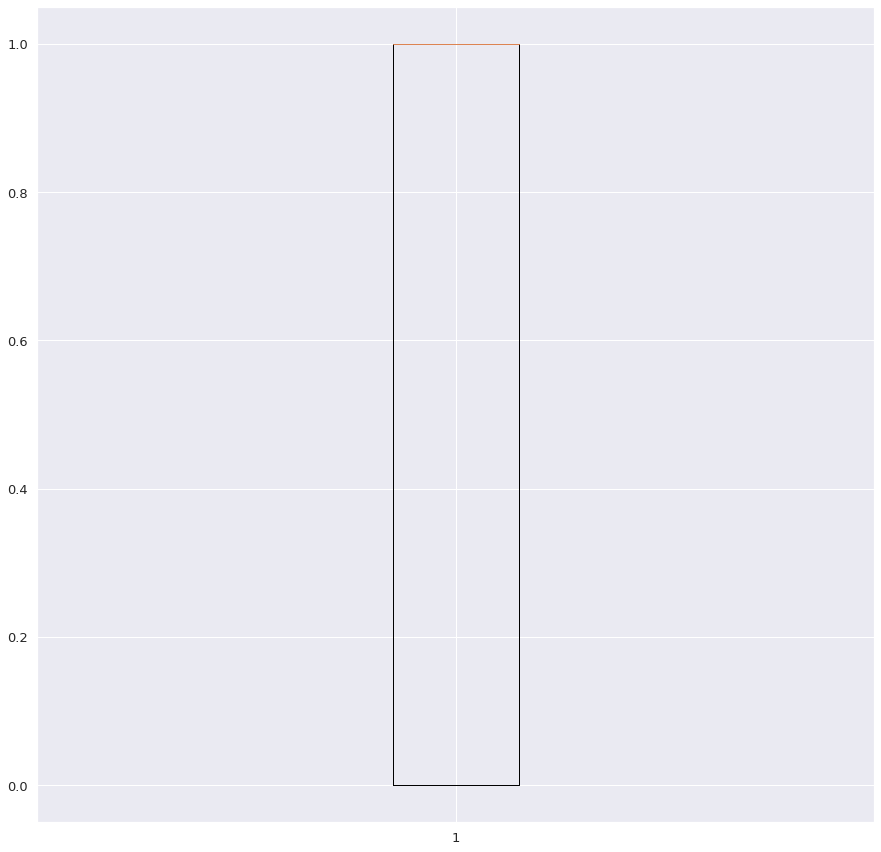

In [248]:
for i in cat_val:
 print(i)
 plt.figure(figsize=(15,15))
 plt.boxplot(dataset[i])
 plt.xticks(size = 13)
 plt.yticks(size = 13)
 plt.show()

age


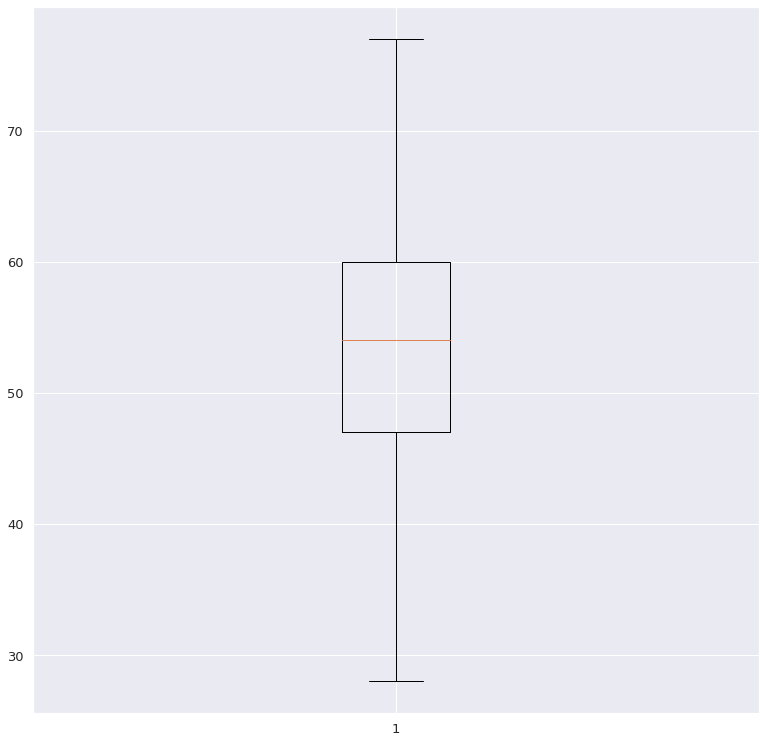

resting bp s


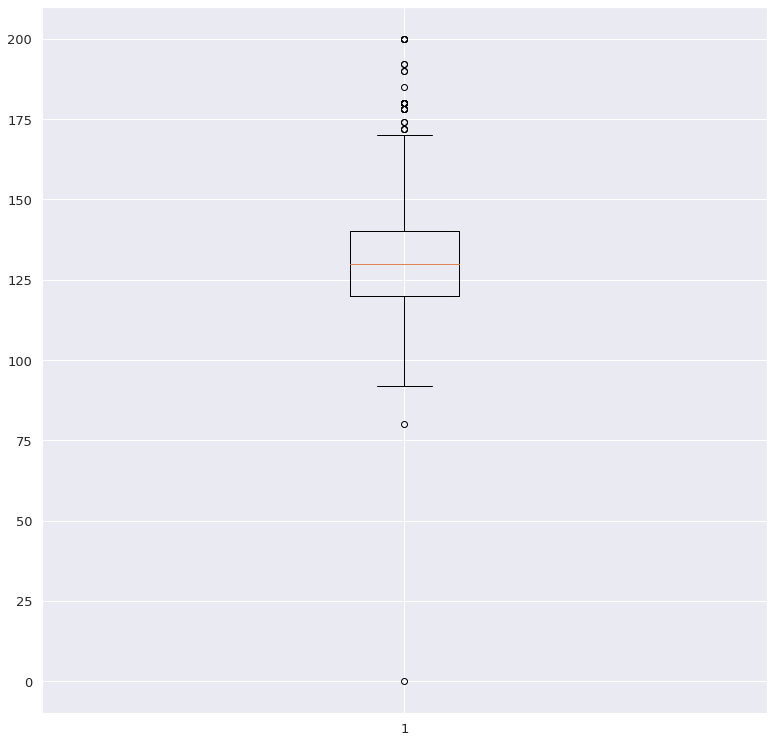

cholesterol


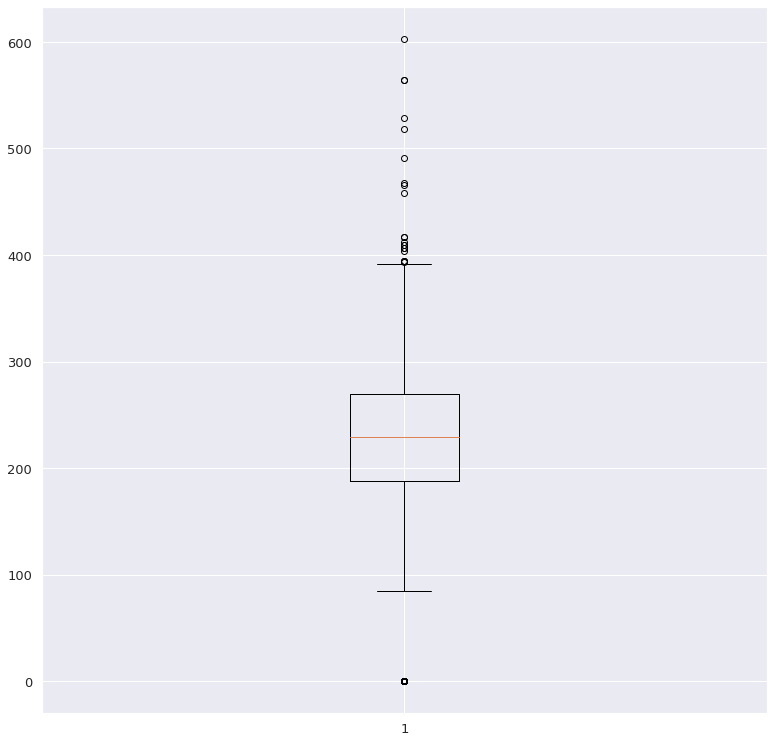

max heart rate


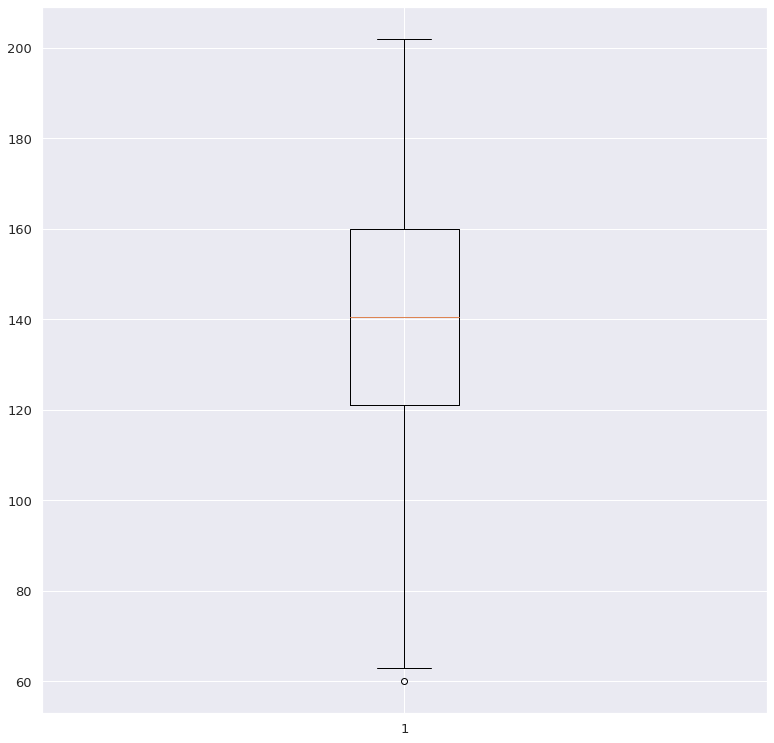

oldpeak


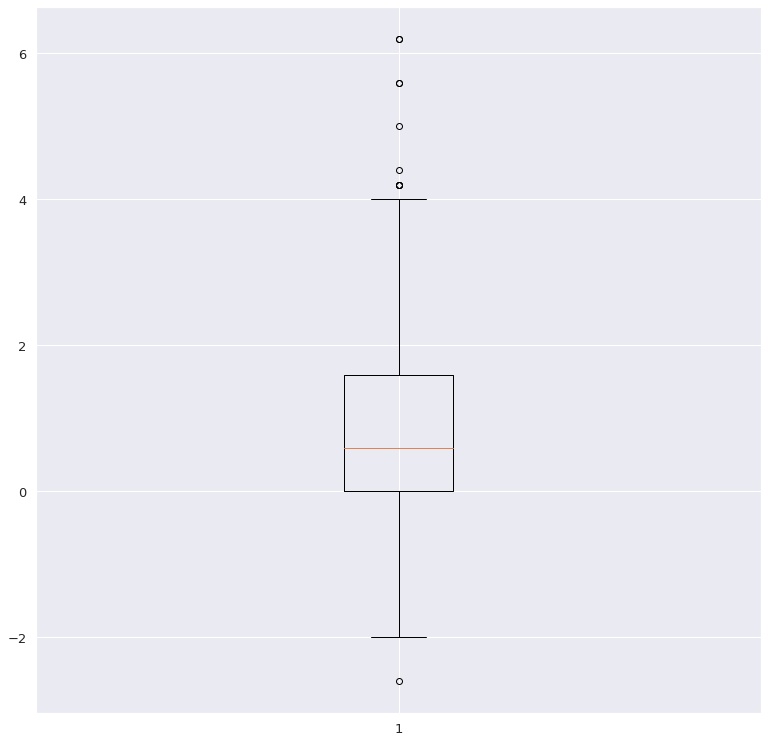

In [249]:
for i in cont_val:
 print(i)
 plt.figure(figsize=(13,13))
 plt.boxplot(dataset[i])
 plt.xticks(size = 13)
 plt.yticks(size = 13)
 plt.show()

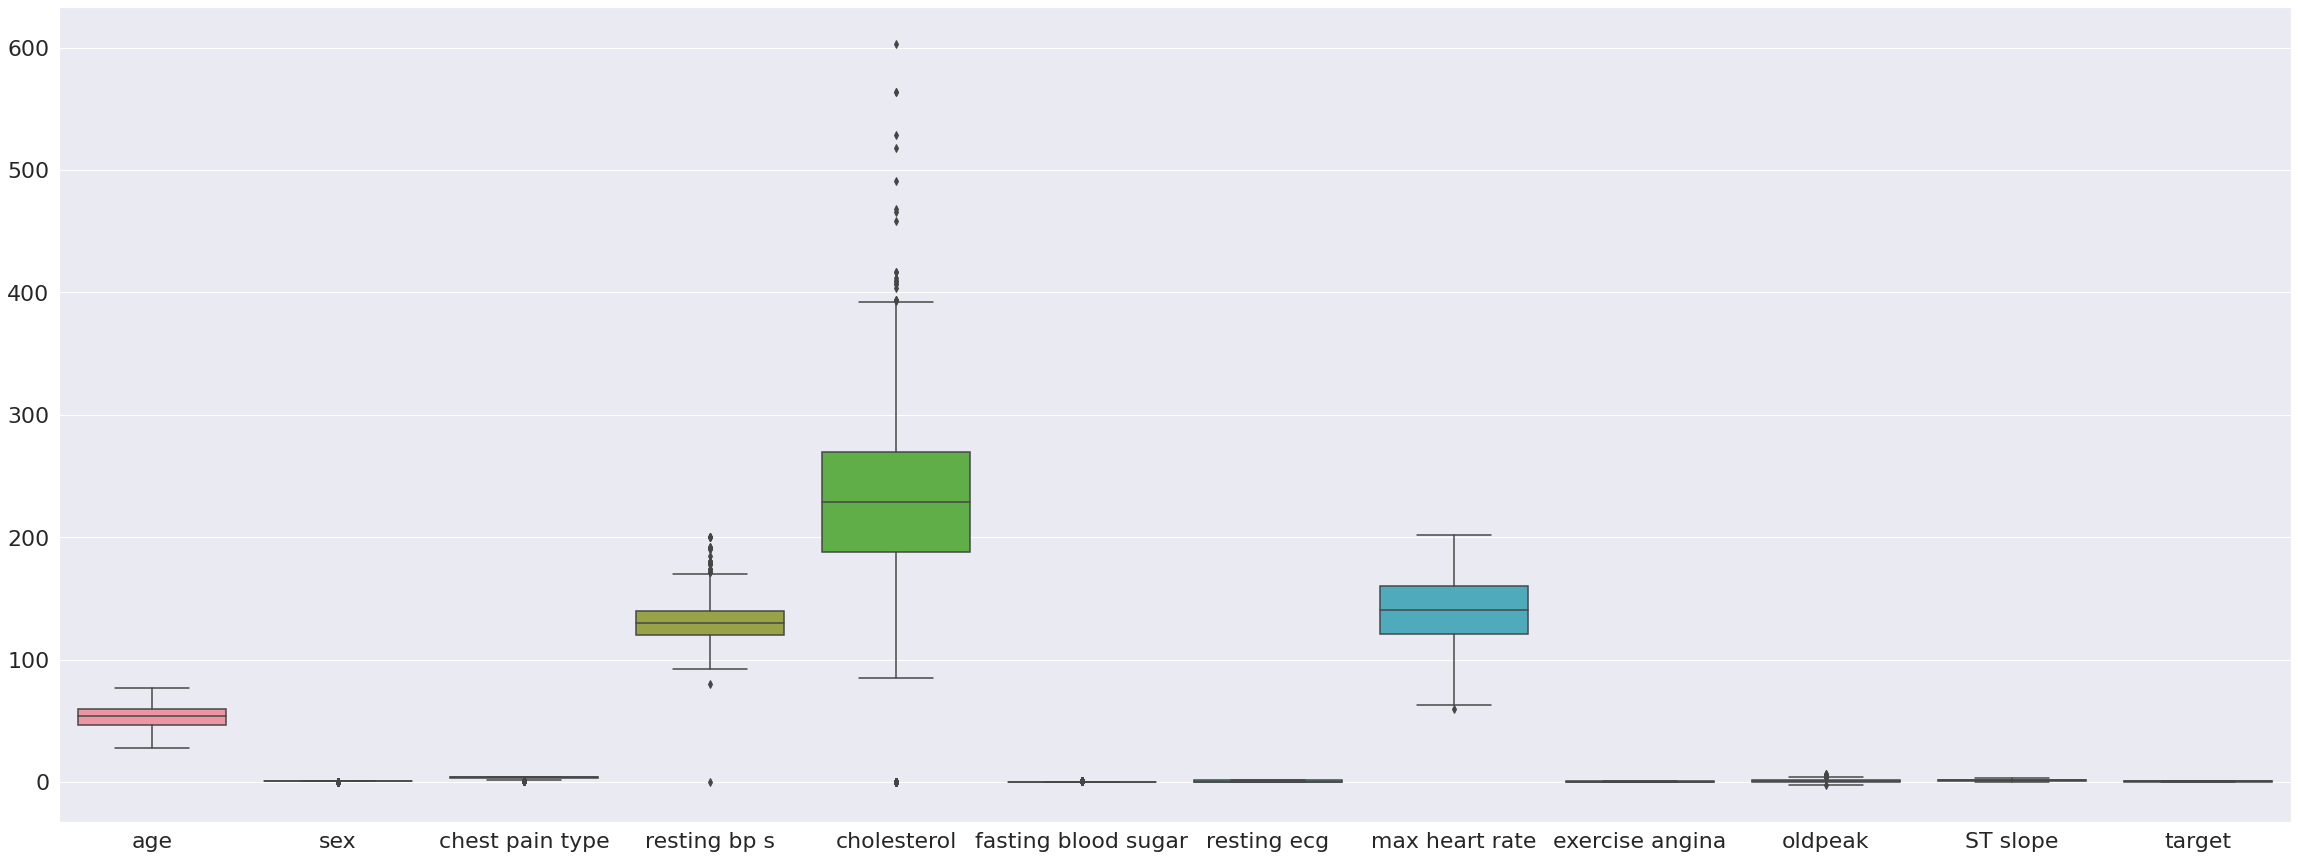

In [250]:
plt.figure(figsize=(40,15), facecolor='w')
sns.boxplot(data=dataset)
plt.show()

In [251]:
from scipy import stats
import numpy as np

In [252]:
z = np.abs(stats.zscore(dataset))
print(z)

           age       sex  chest pain type  resting bp s  cholesterol  \
0     1.466728  0.555995         1.318351      0.427328     0.775674   
1     0.504600  1.798576         0.248932      1.516587     0.299512   
2     1.787437  0.555995         1.318351      0.117301     0.716489   
3     0.611503  1.798576         0.820487      0.318402     0.035867   
4     0.029915  0.555995         0.248932      0.971958     0.151550   
...        ...       ...              ...           ...          ...   
1185  0.932213  0.555995         2.387770      1.206560     0.529071   
1186  1.526558  0.555995         0.820487      0.645180     0.171279   
1187  0.350624  0.555995         0.820487      0.117301     0.782852   
1188  0.350624  1.798576         1.318351      0.117301     0.252877   
1189  1.680534  0.555995         0.248932      0.318402     0.348832   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                0.520929     0.802672        1.265039      

In [253]:
threshold = 3
res = np.where(z > 3)
print("Length:", len(res[0]), ":", len(res[1]))
print("Rows:",res[0])
print("Columns:",res[1])

Length: 28 : 28
Rows: [  30   76  109  149  167  242  325  366  371  391  400  450  593  618
  704  734  761  773  793  852  978 1010 1013 1039 1070 1075 1078 1172]
Columns: [4 4 3 4 9 3 9 3 7 7 3 3 3 4 9 3 3 9 9 9 9 9 3 4 9 3 9 9]


In [254]:
outliers_row = []
for j in res[0]:
    r = []
    for i in dataset.columns:
        r.append(dataset[i][j])
    outliers_row.append(r)
outliers_data = pd.DataFrame(data=outliers_row, columns = dataset.columns)
outliers_data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,53,1,3,145,518,0,0,130,0,0.0,2,1
1,32,1,4,118,529,0,0,130,0,0.0,2,1
2,39,1,2,190,241,0,0,106,0,0.0,1,0
3,54,1,4,130,603,1,0,125,1,1.0,2,1
4,50,1,4,140,231,0,1,140,1,5.0,2,1


In [285]:
X = dataset.drop(['target'], axis=1)


from sklearn.cluster import DBSCAN

model = DBSCAN(eps=5.0, min_samples=5).fit(X)
labels=model.labels_
print(labels)


[-1 -1 -1 ... -1 -1 -1]


In [286]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_ 

2

In [287]:
print("Number of Noise Points: ",sum(model.labels_!=-1)," (",len(model.labels_),")",sep='')

Number of Noise Points: 10 (1190)


In [288]:
from collections import Counter

count= Counter(model.labels_)
count

Counter({-1: 1180, 0: 5, 1: 5})

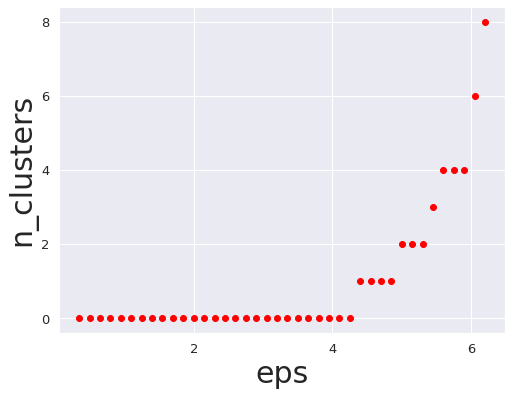

In [289]:
## (finding eps for a fixed min_samples=2)

eps=0.2
for i in range(40):
    eps +=0.15
    model = DBSCAN(eps, min_samples=5).fit(X)
    labels = model.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    plt.figure(2, figsize=(8, 6))
    plt.plot(eps,  n_clusters_,'-o', c='red')
    plt.ylabel('n_clusters', fontsize=30)
    plt.xlabel('eps',fontsize=30)
plt.xticks(size = 13)
plt.yticks(size = 13)    
plt.show() 

In [296]:
outliers = dataset[model.labels_ == 1]; print(outliers)

      age  sex  chest pain type  resting bp s  cholesterol  \
124    58    1                2           130          230   
630    61    1                1           134          234   
647    57    1                3           128          229   
851    62    1                3           130          231   
979    62    1                3           130          231   
994    57    1                3           128          229   
1130   61    1                1           134          234   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
124                     0            0             150                0   
630                     0            0             145                0   
647                     0            2             150                0   
851                     0            0             146                0   
979                     0            0             146                0   
994                     0            2             15

In [297]:
outliers.head(10)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
124,58,1,2,130,230,0,0,150,0,0.0,1,0
630,61,1,1,134,234,0,0,145,0,2.6,2,1
647,57,1,3,128,229,0,2,150,0,0.4,2,1
851,62,1,3,130,231,0,0,146,0,1.8,2,0
979,62,1,3,130,231,0,0,146,0,1.8,2,0
994,57,1,3,128,229,0,2,150,0,0.4,2,1
1130,61,1,1,134,234,0,0,145,0,2.6,2,1


In [298]:
NON_outliers = dataset[model.labels_ == -1]; print(NON_outliers)

      age  sex  chest pain type  resting bp s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
...   ...  ...              ...           ...          ...   
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0             172                0   
1                       0            0             156                0   
2                       0     

Feature Selection

In [263]:
from sklearn.feature_selection import chi2
from sklearn import preprocessing

X = preprocessing.MinMaxScaler().fit_transform(dataset.drop('target',axis=1))
y = dataset['target']

print("The total features  :",X.shape)
print("The Feature Outcome :",y.shape)


print("Chi-Squared values for the data -",X.shape,y.shape)
chi_scores = chi2(X,y)
chi_scores

The total features  : (1190, 11)
The Feature Outcome : (1190,)
Chi-Squared values for the data - (1190, 11) (1190,)


(array([  5.67276568,  27.22525316,  32.88824949,   0.22375765,
          3.79385451,  43.95153063,   3.44229149,  11.67945233,
        168.98955374,   7.18373451,  23.24431957]),
 array([1.72302703e-02, 1.81078018e-07, 9.76114875e-09, 6.36191577e-01,
        5.14410599e-02, 3.36609010e-11, 6.35474984e-02, 6.31941322e-04,
        1.22987732e-38, 7.35674215e-03, 1.42671223e-06]))

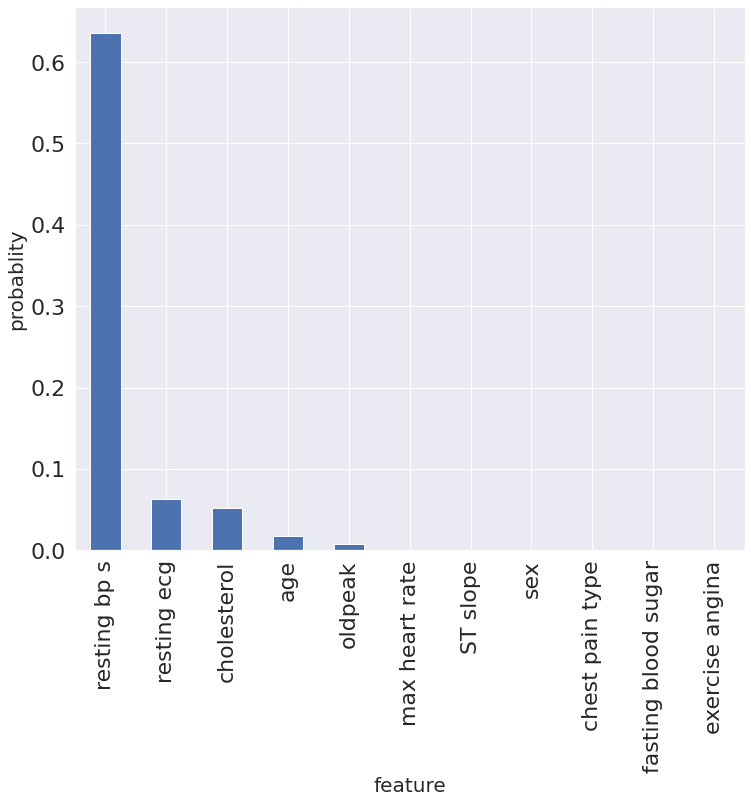

In [264]:
p_values = pd.Series(chi_scores[1],index = dataset.drop('target',axis=1).columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()
plt.xlabel('feature', fontsize=20)
plt.ylabel('probablity', fontsize=20)
plt.savefig('chisq.png')
plt.show()
#files.download('chisq.png')

In [265]:
from sklearn.feature_selection import SelectKBest

In [266]:
best=SelectKBest(score_func=chi2, k=10)
fit=best.fit(X,y)
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(dataset.drop('target',axis=1).columns)

scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))

                Feature       Score
8       exercise angina  168.989554
5   fasting blood sugar   43.951531
2       chest pain type   32.888249
1                   sex   27.225253
10             ST slope   23.244320
7        max heart rate   11.679452
9               oldpeak    7.183735
0                   age    5.672766
4           cholesterol    3.793855
6           resting ecg    3.442291
3          resting bp s    0.223758


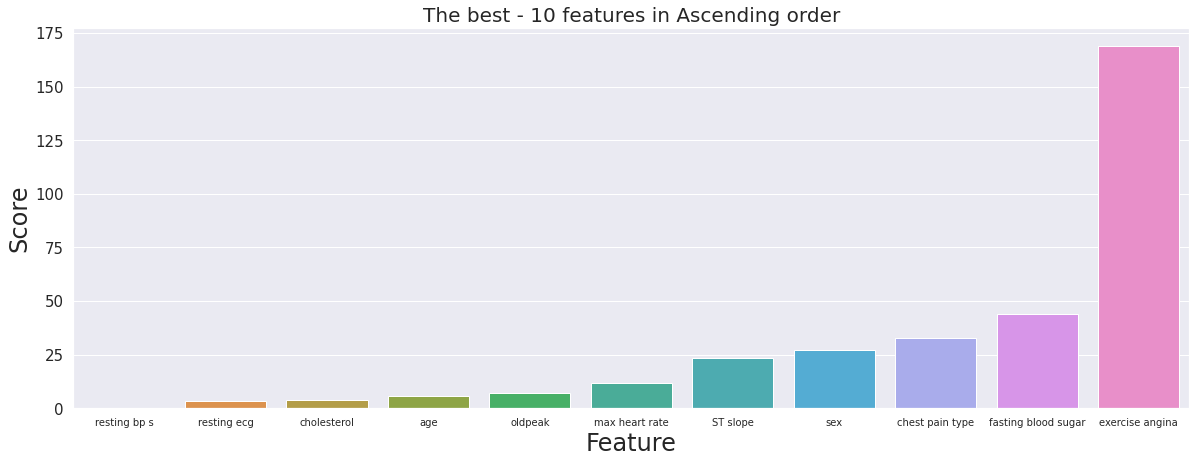

In [267]:
scores=scores.sort_values(by="Score", ascending=True)
plt.figure(figsize=(20,7), facecolor='w')
sns.set(font_scale = 2)
sns.barplot(x='Feature',y='Score',data=scores)
plt.title("The best - 10 features in Ascending order", size=20)
plt.xticks(size = 10)
plt.yticks(size = 15)
plt.show()

In [268]:
best_features_chisquared=scores["Feature"].tolist()[:10]
best_features_chisquared

['resting bp s',
 'resting ecg',
 'cholesterol',
 'age',
 'oldpeak',
 'max heart rate',
 'ST slope',
 'sex',
 'chest pain type',
 'fasting blood sugar']

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


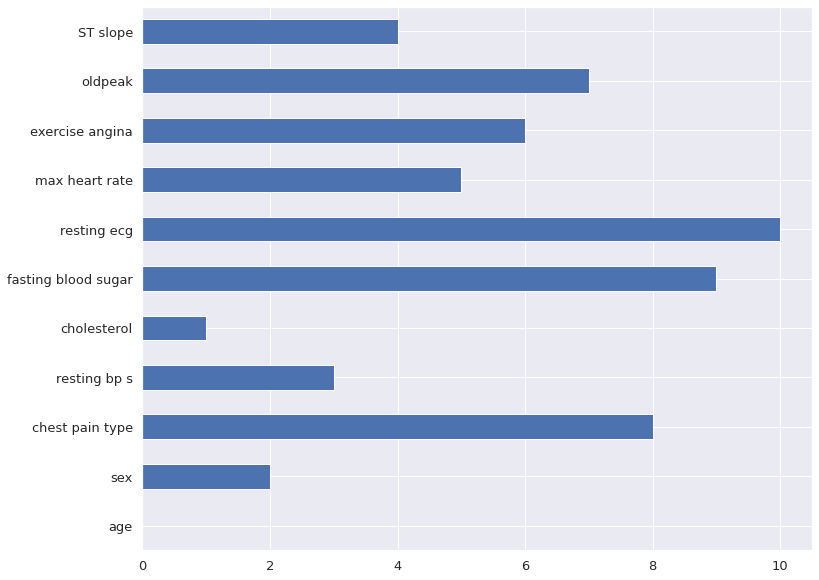

In [269]:
!pip install skfeature-chappers
from skfeature.function.similarity_based import fisher_score

dataset.reset_index(drop=True, inplace=True)

X = dataset.drop('target',axis=1)
y = dataset.target

#X = X.astype(int)

#print(X.shape)
#print(y.shape)

#score = fisher_score.fisher_score(X,y)
idx = fisher_score.fisher_score(X.to_numpy(),y.to_numpy(), mode='rank')

#plotting the ranked_features
f_ranks=pd.Series(idx,dataset.columns[0:len(dataset.columns)-1])
f_ranks.plot(kind='barh')
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

In [270]:
"""

!pip install sklearn-genetic
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import time
from genetic_selection import GeneticSelectionCV

scores=["f1","accuracy", "balanced_accuracy","precision","precision_macro","recall", "recall_macro"]
"""
#invalid - log-loss,
scores=['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'f1_macro', 
'f1_micro', 'f1_samples', 'f1_weighted', 'log_loss', 'mean_absolute_error', 
'mean_squared_error', 'median_absolute_error', 'precision',   
'precision_macro', 'precision_micro', 'precision_samples', 
'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 
'recall_samples', 'recall_weighted', 'roc_auc']
"""
"""
"""
estimator = DecisionTreeClassifier()
for i in scores:
  model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring=i, max_features=7,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
  model = model.fit(X, y)
  print("Scoring crieria -",i)
  print('Features:', X.columns[model.support_])
"""
"""
estimators = [GaussianNB(), DecisionTreeClassifier(), SVC()]
names = ["Naive Bayes", "Decision Tree", "SVM"]
for est, name in zip(estimators, names):
    print("Starting...")
    print("Model -",name)
    start = time.time()
    for s in scores:
        model = GeneticSelectionCV(
        est, cv=5, verbose=0,
        scoring=s, max_features=7,
        n_population=100, crossover_proba=0.5,
        mutation_proba=0.2, n_generations=50,
        crossover_independent_proba=0.5,
        mutation_independent_proba=0.04,
        tournament_size=3, n_gen_no_change=10,
        caching=True, n_jobs=-1)
        model = model.fit(X, y)
        print()
        print("Scoring crieria -",s)
        print('Features:', X.columns[model.support_])
        print("Cross-Validation Score - ",cross_val_score(model, X, y,scoring=s, cv=10).mean())
    print("DONE!!!")
    print("time taken for the model -",name)
    print(time.time() - start)
    print()
    """

'\nestimators = [GaussianNB(), DecisionTreeClassifier(), SVC()]\nnames = ["Naive Bayes", "Decision Tree", "SVM"]\nfor est, name in zip(estimators, names):\n    print("Starting...")\n    print("Model -",name)\n    start = time.time()\n    for s in scores:\n        model = GeneticSelectionCV(\n        est, cv=5, verbose=0,\n        scoring=s, max_features=7,\n        n_population=100, crossover_proba=0.5,\n        mutation_proba=0.2, n_generations=50,\n        crossover_independent_proba=0.5,\n        mutation_independent_proba=0.04,\n        tournament_size=3, n_gen_no_change=10,\n        caching=True, n_jobs=-1)\n        model = model.fit(X, y)\n        print()\n        print("Scoring crieria -",s)\n        print(\'Features:\', X.columns[model.support_])\n        print("Cross-Validation Score - ",cross_val_score(model, X, y,scoring=s, cv=10).mean())\n    print("DONE!!!")\n    print("time taken for the model -",name)\n    print(time.time() - start)\n    print()\n    '

In [271]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

scaler = preprocessing.StandardScaler()

final_dataset = dataset[['age','exercise angina','sex','cholesterol']]
scaler.fit(final_dataset)
final_X_scaled_array = scaler.transform(final_dataset)
final_X_scaled = pd.DataFrame(final_X_scaled_array, columns = final_dataset.columns)

ndimensions = 2

pca = PCA(n_components=ndimensions, random_state=0)
pca.fit(final_X_scaled)
final_X_pca_array = pca.transform(final_X_scaled)
final_X_pca = pd.DataFrame(final_X_pca_array, columns=['PC1','PC2'])
final_X_pca.head(10)

,PC1,PC2
0,1.025161,-1.040097
1,1.556642,-0.109170
2,1.120820,-1.275940
3,0.592385,0.817168
4,0.043453,-0.590693
5,1.285208,-0.841152
6,1.969388,-0.076679
7,0.100493,-0.521303
8,-0.366746,-0.868806
9,2.053625,0.378009


In [272]:
#using random 2 features without pca

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture as GMM1

NUM_CLUSTERS = 2
MAX_ITERATIONS = 10
COLORS = ['red', 'blue']

def print_results(means_clusters, probability_clusters, label_cluster_points):
    print('\n\nFINAL RESULT:')
    for i, c in enumerate(means_clusters):
        print('\tCluster %d' % (i + 1))
        print('\t\tNumber Points in Cluster %d' % label_cluster_points.count(i))
        print('\t\tCentroid: %s' % str(means_clusters[i]))
        print('\t\tProbability: %02f%%' % (probability_clusters[i] * 100))


def plot_ellipse(center, covariance, alpha, color):
    # eigenvalues and eigenvector of matrix covariance
    eigenvalues, eigenvector = np.linalg.eigh(covariance)
    order = eigenvalues.argsort()[::-1]
    eigenvector = eigenvector[:, order]

    # Calculate Angle of ellipse
    angle = np.degrees(np.arctan2(*eigenvector[:, 0][::-1]))

    # Calculate with, height
    width, height = 4 * np.sqrt(eigenvalues[order])

    # Ellipse Object
    ellipse = Ellipse(xy=center, width=width, height=height, angle=angle,
                      alpha=alpha, color=color)

    ax = plt.gca()
    ax.add_artist(ellipse)

    return ellipse


def plot_results(points, means_clusters, label_cluster_points,
                 covars_matrix_clusters):
    plt.figure(figsize=(15,10))
    plt.plot()
    for nc in range(len(means_clusters)):
        # Plot points in cluster
        points_cluster = list()
        for i, p in enumerate(label_cluster_points):
            if p == nc:
                plt.plot(points[i][0], points[i][1], linestyle='None',
                         color=COLORS[nc], marker='.')
                points_cluster.append(points[i])
        # Plot mean
        mean = means_clusters[nc]
        plt.plot(mean[0], mean[1], 'o', markerfacecolor=COLORS[nc],
                 markeredgecolor='k', markersize=10)

        # Plot Ellipse
        plot_ellipse(mean, covars_matrix_clusters[nc], 0.2, COLORS[nc]) 
        plt.xticks(size = 15)
        plt.yticks(size = 15)
    plt.show()


def expectation_maximization(dataset, num_clusters, max_iterations):
    # Read data set
    points = dataset.values

    # Object GMM
    gmm = GMM1(n_components=num_clusters, covariance_type='full',n_init=max_iterations)

    # Estimate Model (params='wmc'). Calculate, w=weights, m=mean, c=covars
    gmm.fit(points)

    # Predict Cluster of each point
    label_cluster_points = gmm.predict(points)

    means_clusters = gmm.means_
    probability_clusters = gmm.weights_
    covars_matrix_clusters = gmm.covariances_

    # Print final result
    print_results(means_clusters, probability_clusters,
                  label_cluster_points.tolist())

    # Plot Final results
    plot_results(points, means_clusters, label_cluster_points,
                 covars_matrix_clusters)

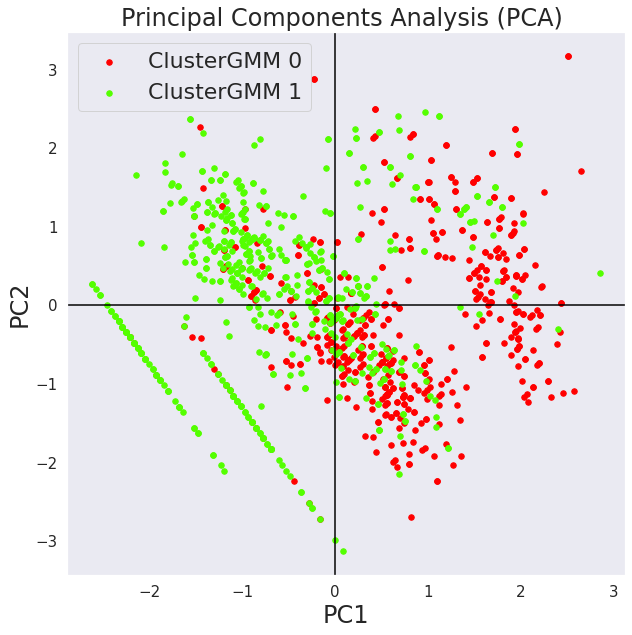

In [273]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from google.colab import files

y = dataset['target']

def plotData(df, groupby):
    fig, ax = plt.subplots(figsize = (10,10))

    # color map
    cmap = mpl.cm.get_cmap('prism')

    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'PC1', y = 'PC2',
                     color = cmap(i/(2-1)), 
                     label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_title("Principal Components Analysis (PCA) ");


df_plot = final_X_pca.copy()

df_plot['ClusterGMM'] = y
plotData(df_plot, 'ClusterGMM')
plt.savefig('pca.png')
plt.show()
#files.download('pca.png')



FINAL RESULT:
	Cluster 1
		Number Points in Cluster 252
		Centroid: [1.54769251 0.77699513]
		Probability: 20.181212%
	Cluster 2
		Number Points in Cluster 938
		Centroid: [-0.39131527 -0.19645379]
		Probability: 79.818788%


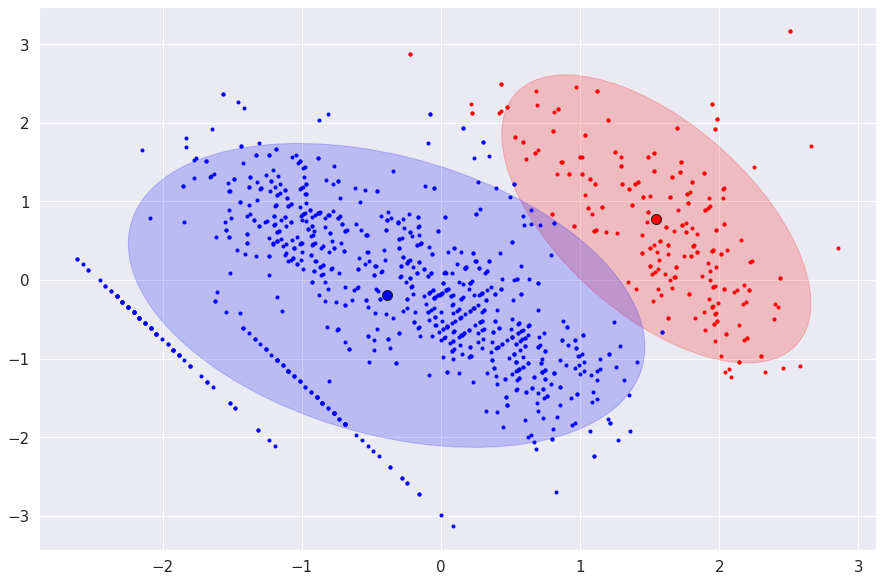

In [274]:
em=expectation_maximization(final_X_pca, NUM_CLUSTERS,MAX_ITERATIONS)


Weights:
 [0.76208641 0.23791359]

Means:
 [[-0.4325531  -0.22079329]
 [ 1.38555705  0.70724656]]

Type of covariance_GMM:
 <class 'numpy.ndarray'>
[0 1 0 ... 0 1 0]

The best paramters are for SVM: 
 {'C': 1, 'coef0': 0.001, 'degree': 1, 'gamma': 'scale'}

Fold:1, Train set: 793, Test set:397
Fold:2, Train set: 793, Test set:397
Fold:3, Train set: 794, Test set:396
Scores for each fold: [-0. -0. -0.]
rmse= -0.00
Accuracy is : 1.0

given input is ,
            PC1       PC2
759   0.372833 -0.659617
439  -2.332204 -0.207292
811   0.550685 -0.678066
399  -1.884925 -0.954620
88    0.911951 -0.825605
...        ...       ...
669   1.945939  2.242881
757  -0.288573  0.179437
1015  0.559763 -1.136640
1154 -0.058938 -0.128232
645   0.034376 -0.132119

[357 rows x 2 columns]


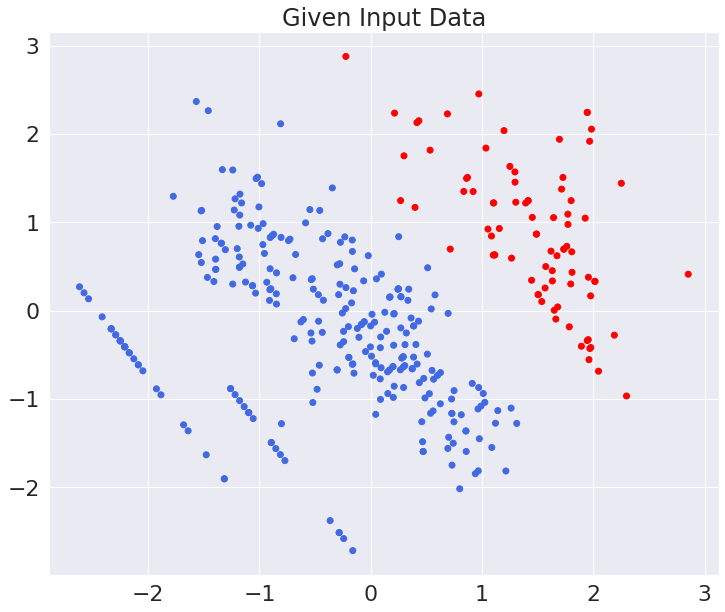


predicted values are :
 [0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0
 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1
 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1
 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0]



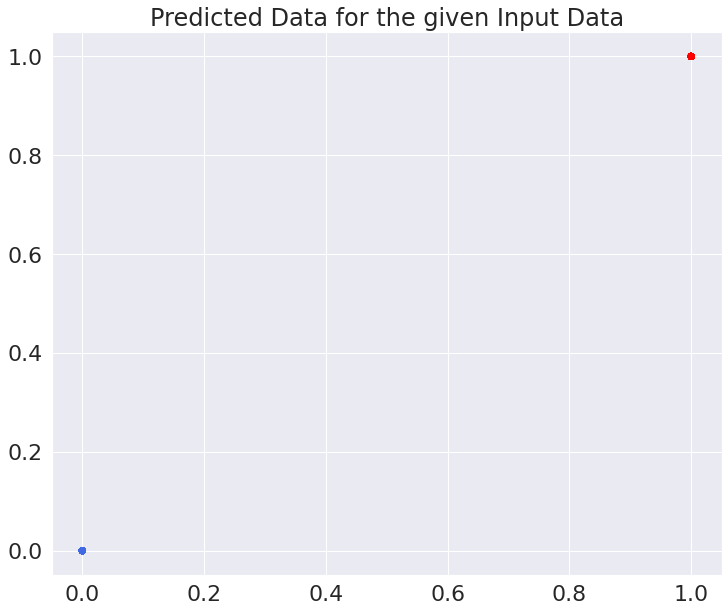


no.of predictions made are 
 (357,)

the predicted data to actual data for the given input data is shown below 

           PC1       PC2  actual  Predicted
759   0.372833 -0.659617       0          0
439  -2.332204 -0.207292       0          0
811   0.550685 -0.678066       0          0
399  -1.884925 -0.954620       0          0
88    0.911951 -0.825605       0          0
1135  0.199368 -0.635830       0          0
465  -2.169557 -0.479048       0          0
1120 -0.223497  2.877152       1          1
239  -0.164646  0.668497       0          0
666   1.103501  1.218048       1          1

Confusion matrix for the model is shown below 

[[274   0]
 [  0  83]]

Precision and Recall for the model are shown below 

1.0 0.7675070028011205

F1-score -  0.8684627575277338


In [275]:
from sklearn.mixture import GaussianMixture
import pandas as pd
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate,GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold,LeaveOneOut

colors = ['royalblue','red']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

seed=0

GMM = GMM1(n_components=2, covariance_type='tied',n_init=50,random_state=3)
res_GMM = GMM.fit(final_X_pca)

weights_GMM = GMM.weights_
print()
print("Weights:\n",weights_GMM)

means_GMM = GMM.means_
print()
print("Means:\n",means_GMM)

covariance_GMM = GMM.covariances_
print()
print("Type of covariance_GMM:\n",type(covariance_GMM))

covariance_GMM.size

y = res_GMM.predict(final_X_pca)
print(y)

#splitting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(final_X_pca,y,test_size=0.3,random_state=6)

grd1 = GridSearchCV(estimator = SVC(kernel='linear'),
                  param_grid = {
                      'C' :   [0.1,0.01,0.001,1,10,100],
                      'degree' : [1,2,3,4],
                      'coef0' : [0.001,0.0001],
                      'gamma':['scale','auto']
                  }, cv=3,verbose=0,n_jobs=-1)

#fitting into the grid
grid1 = grd1.fit(x_train,y_train)

print()
best_parameters = grid1.best_params_
print("The best paramters are for SVM: \n",best_parameters)

best_model1 = SVC(kernel='linear',C=best_parameters["C"], gamma=best_parameters["gamma"], coef0=best_parameters["coef0"], shrinking=True,
                   tol=0.001, cache_size=50, verbose=False, max_iter=-1,  probability=True).fit(x_train,y_train)

#scoring = {'accuracy_score': 'accuracy','log_loss_score': 'neg_log_loss'}

#scores = cross_validate(best_model1, final_X_pca, y, cv=3, scoring=scoring, return_train_score = True)

print()
#print("Testing accuracy is: ",scores['test_accuracy_score'].mean())

n=3
rs=5

kf =KFold(n_splits=n, shuffle=True, random_state=rs)
skf = StratifiedKFold(n_splits=n, shuffle=True, random_state=rs)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

score = cross_val_score(best_model1, final_X_pca, y, cv= skf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

"""
kf=KFold(n_splits=3)
score=cross_val_score(best_model1,final_X_pca,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

stratifiedkf=StratifiedKFold(n_splits=3)
score=cross_val_score(best_model1,final_X_pca,y,cv=stratifiedkf)
print("Stratified KFold Cross Validation Scores are {}".format(score))
print("Stratified KFold Average Cross Validation score :{}".format(score.mean()))

loo=LeaveOneOut()
score=cross_val_score(best_model1,final_X_pca,y,cv=loo)
print("LeaveOneOut Cross Validation Scores are {}".format(score))
print("LeaveOneOut Average Cross Validation score :{}".format(score.mean()))
"""

y_pred_svm =best_model1.predict(x_test)
print("Accuracy is :",accuracy_score(y_test,y_pred_svm))

print()
print("given input is ,\n",x_test)
plt.scatter(x_test['PC1'], x_test['PC2'],c=vectorizer(y_test))
plt.title("Given Input Data")
plt.show()

print()
print("predicted values are :\n", y_pred_svm)
print()
plt.scatter(y_test, y_pred_svm,c=vectorizer(y_test))
plt.title("Predicted Data for the given Input Data")
plt.show()

predicted_data = pd.DataFrame().assign(PC1=x_test['PC1'], PC2=x_test['PC2'],actual=y_test,Predicted = y_pred_svm)

print()
print("no.of predictions made are \n",y_pred_svm.shape)
print()

print("the predicted data to actual data for the given input data is shown below \n")

print(predicted_data.head(10))

cm_svm = confusion_matrix(y_test, y_pred_svm)
print()
print("Confusion matrix for the model is shown below \n")
print(cm_svm)

recall_svm = cm_svm[0][0]/(cm_svm[0][0] + cm_svm[0][1])
precision_svm = cm_svm[0][0]/(cm_svm[0][0]+cm_svm[1][1])
print()
print("Precision and Recall for the model are shown below \n")
print(recall_svm,precision_svm)

F1_svm = (2*precision_svm*recall_svm)/(precision_svm+recall_svm)

print()
print("F1-score - ",F1_svm)

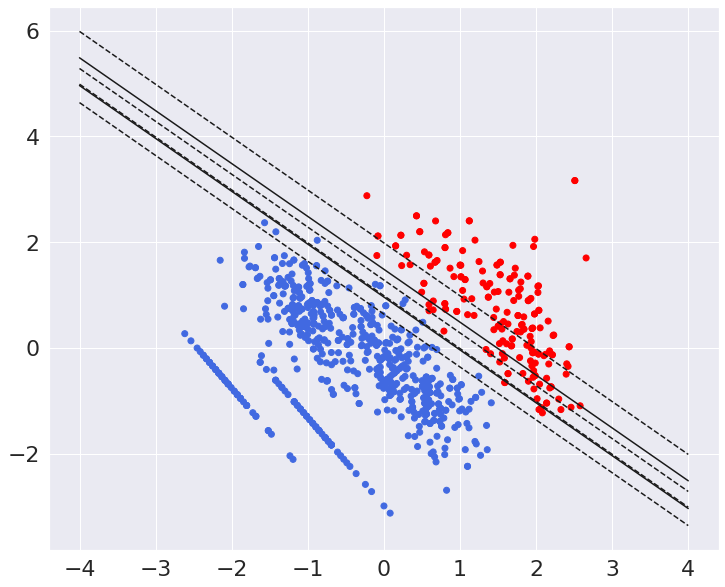

In [276]:
w=best_model1.coef_
b=best_model1.intercept_

def f(x, w, b, c=0):
    return (-w[0] * x - b + c) / w[0]

plt.scatter(x_train['PC1'], x_train['PC2'],c=vectorizer(y_train))

# w.x + b = 0
a0 = -4; a1 = f(a0, w, b)
b0 = 4; b1 = f(b0, w, b)
plt.plot([a0,b0], [a1,b1], 'k')

# w.x + b = 1
a0 = -4; a1 = f(a0, w, b, 1)
b0 = 4; b1 = f(b0, w, b, 1)
plt.plot([a0,b0], [a1,b1], 'k--')

# w.x + b = -1
a0 = -4; a1 = f(a0, w, b, -1)
b0 = 4; b1 = f(b0, w, b, -1)
plt.plot([a0,b0], [a1,b1], 'k--')

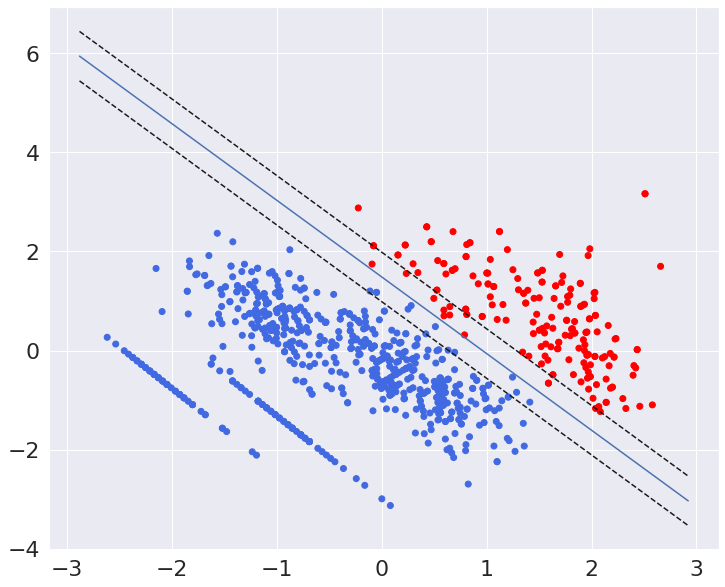

In [277]:
plt.scatter(x_train['PC1'], x_train['PC2'], c=vectorizer(y_train));
ax = plt.gca()
xlim = ax.get_xlim()
w = best_model1.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - best_model1.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (best_model1.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (best_model1.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')

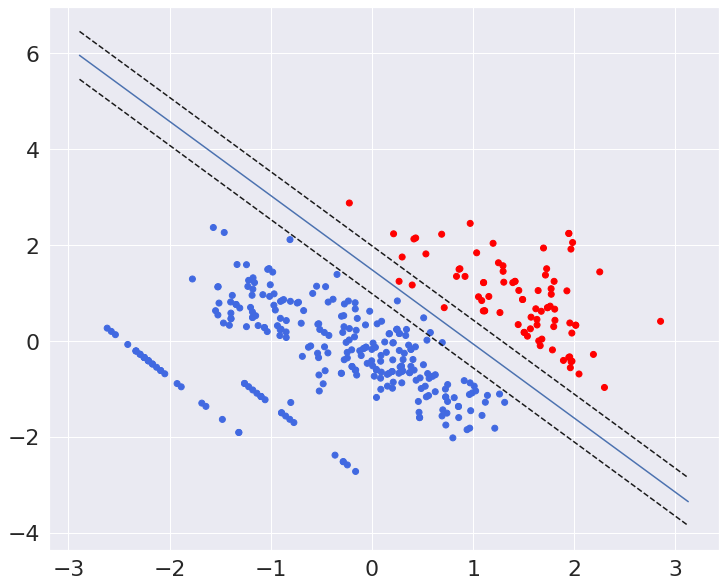

In [278]:
plt.scatter(x_test['PC1'], x_test['PC2'], c=vectorizer(y_test));
ax = plt.gca()
xlim = ax.get_xlim()
w = best_model1.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - best_model1.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (best_model1.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (best_model1.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')